# Empezamos nuestro análisis importando nuestras librerías necesarias con las cuales vamos a trabajar 

In [2]:
#librerías
import pandas as pd
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from fancyimpute import KNN
from sklearn.impute import KNNImputer


## vamos a cargar nuestros datasets que hemos obtenido en datosabiertos.enacom.gob.ar

In [3]:
#cargamos nuestro primer dataframe que va ser AccesosaInternetfijoportecnologiaylocalidad.csv
acceso_internet_localidad_df = pd.read_csv('..\data\AccesosaInternetfijoportecnologiaylocalidad.csv')
acceso_internet_localidad_df.head()


,Provincia,Partido,Localidad,Link Indec,ADSL,CABLEMODEM,DIAL UP,FIBRA OPTICA,OTROS,SATELITAL,WIMAX,WIRELESS,Total general,Unnamed: 13
0,BUENOS AIRES,25 de Mayo,25 de Mayo,6854100,873,4.704,- 0,2,- 0,975,- 0,664,7.218,NaN
1,BUENOS AIRES,25 de Mayo,Del Valle,6854020,181,- 0,- 0,- 0,10,1,- 0,- 0,192,NaN
2,BUENOS AIRES,25 de Mayo,Gobernador Ugarte,6854040,- 0,- 0,- 0,- 0,- 0,- 0,- 0,181,181,NaN
3,BUENOS AIRES,25 de Mayo,Norberto de la Riestra,6854060,- 0,782,- 0,6,167,- 0,- 0,327,1.282,NaN
4,BUENOS AIRES,25 de Mayo,Lucas Monteverde,6854050,- 0,- 0,- 0,- 0,- 0,- 0,- 0,6,6,NaN


# 1. Vamos a revisar la estructura del conjunto de datos

In [4]:
#verificamos el número de filas y columnas en el conjunto de datos 
print("Número de filas y columnas:", acceso_internet_localidad_df.shape)

Número de filas y columnas: (3142, 14)


In [5]:
#verificamos las columnas
print("Nombres de columnas:", acceso_internet_localidad_df.columns)

Nombres de columnas: Index(['Provincia', 'Partido', 'Localidad', 'Link Indec', 'ADSL', 'CABLEMODEM',
       'DIAL UP', 'FIBRA OPTICA', 'OTROS', 'SATELITAL', 'WIMAX', 'WIRELESS',
       'Total general', 'Unnamed: 13'],
      dtype='object')


In [6]:
#examinamos los tipos de datos de cada columna
print("Tipos de datos de las columnas:\n", acceso_internet_localidad_df.dtypes)

Tipos de datos de las columnas:
 Provincia         object
Partido           object
Localidad         object
Link Indec        object
ADSL              object
CABLEMODEM        object
DIAL UP           object
FIBRA OPTICA      object
OTROS             object
SATELITAL         object
WIMAX             object
WIRELESS          object
Total general     object
Unnamed: 13      float64
dtype: object


In [7]:
# Eliminar columnas irrelevantes
acceso_internet_localidad_df = acceso_internet_localidad_df.drop(['Link Indec', 'Unnamed: 13'], axis=1)

In [8]:
# Lidiar con los valores faltantes
print("Valores faltantes por columna:\n", acceso_internet_localidad_df.isnull().sum())

Valores faltantes por columna:
 Provincia        0
Partido          0
Localidad        0
ADSL             0
CABLEMODEM       0
DIAL UP          0
FIBRA OPTICA     0
OTROS            0
SATELITAL        0
WIMAX            0
WIRELESS         0
Total general    0
dtype: int64


In [9]:
# Mostrar los tipos de datos actualizados
print(acceso_internet_localidad_df.dtypes)

Provincia        object
Partido          object
Localidad        object
ADSL             object
CABLEMODEM       object
DIAL UP          object
FIBRA OPTICA     object
OTROS            object
SATELITAL        object
WIMAX            object
WIRELESS         object
Total general    object
dtype: object


In [10]:
acceso_internet_localidad_df.head()

,Provincia,Partido,Localidad,ADSL,CABLEMODEM,DIAL UP,FIBRA OPTICA,OTROS,SATELITAL,WIMAX,WIRELESS,Total general
0,BUENOS AIRES,25 de Mayo,25 de Mayo,873,4.704,- 0,2,- 0,975,- 0,664,7.218
1,BUENOS AIRES,25 de Mayo,Del Valle,181,- 0,- 0,- 0,10,1,- 0,- 0,192
2,BUENOS AIRES,25 de Mayo,Gobernador Ugarte,- 0,- 0,- 0,- 0,- 0,- 0,- 0,181,181
3,BUENOS AIRES,25 de Mayo,Norberto de la Riestra,- 0,782,- 0,6,167,- 0,- 0,327,1.282
4,BUENOS AIRES,25 de Mayo,Lucas Monteverde,- 0,- 0,- 0,- 0,- 0,- 0,- 0,6,6


In [108]:
#guardamos nuestro dataframe
acceso_internet_localidad_df.to_csv('../data_clean/acceso_internet_fifo_tecnologia_localidad_.csv', index=False)

In [11]:
# Calcular la cantidad de localidades y sus nombres
cantidad_localidades = acceso_internet_localidad_df['Localidad'].nunique()
nombres_localidades = acceso_internet_localidad_df['Localidad'].unique()

# Imprimir la cantidad de localidades y sus nombres
print("Cantidad de localidades:", cantidad_localidades)
print("Nombres de las localidades:", nombres_localidades)


Cantidad de localidades: 2850
Nombres de las localidades: ['25 de Mayo' 'Del Valle' 'Gobernador Ugarte' ... 'Villa  de Trancas'
 'Villa Carmela' 'Yerba Buena - Marcos Paz']


## Vamos a realizar un resumen estadítico y gráficarlo según nuestras consultas

In [12]:
'''Vamos a obtener una visión general de las estadísticas descriptivas de las columnas numéricas utilizando el método describe().
 Esto te proporcionará información como la media, la mediana, la desviación estándar, los valores mínimos y máximos, etc.'''
print(acceso_internet_localidad_df.describe())

           Provincia       Partido Localidad  ADSL CABLEMODEM DIAL UP  \
count           3142          3142      3142  3142       3142    3142   
unique            24           432      2850   724        693      86   
top     BUENOS AIRES  General Roca     OTROS   - 0        - 0     - 0   
freq             716            57        69  2016       2295    2760   

       FIBRA OPTICA OTROS SATELITAL WIMAX WIRELESS Total general  
count          3142  3142      3142  3142     3142          3142  
unique          706   219        24    12      606          1348  
top             - 0   - 0       - 0   - 0      - 0             1  
freq           1743  2537      2089  3131      934           193  


In [18]:
#convertimos nuestras columnas a tipo numéricos
columnas_numericas = ['ADSL', 'CABLEMODEM', 'DIAL UP', 'FIBRA OPTICA', 'OTROS', 'SATELITAL', 'WIMAX', 'WIRELESS','Total general']

for columna in columnas_numericas:
    acceso_internet_localidad_df[columna] = pd.to_numeric(acceso_internet_localidad_df[columna], errors='coerce')


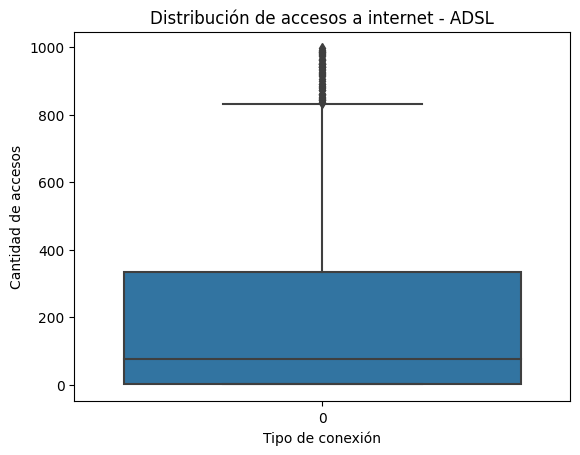

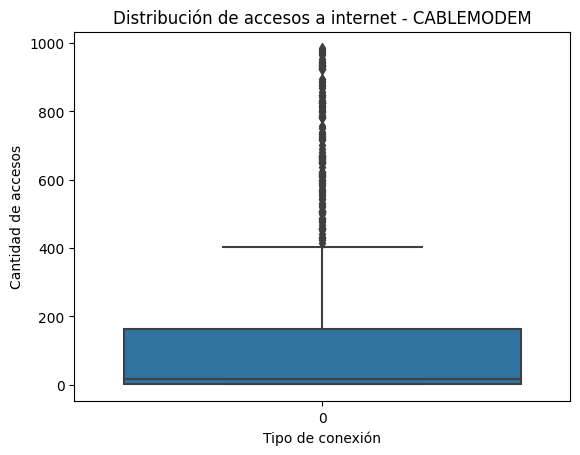

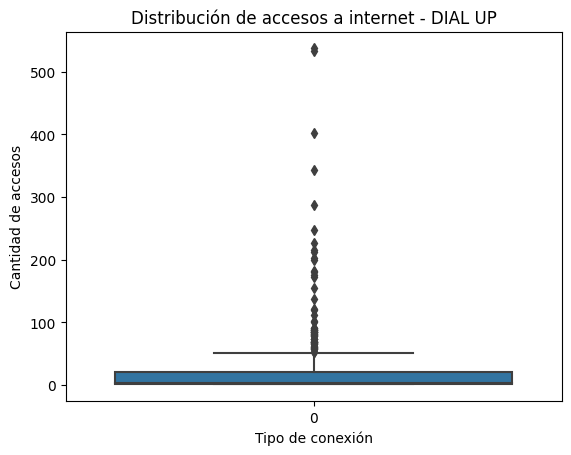

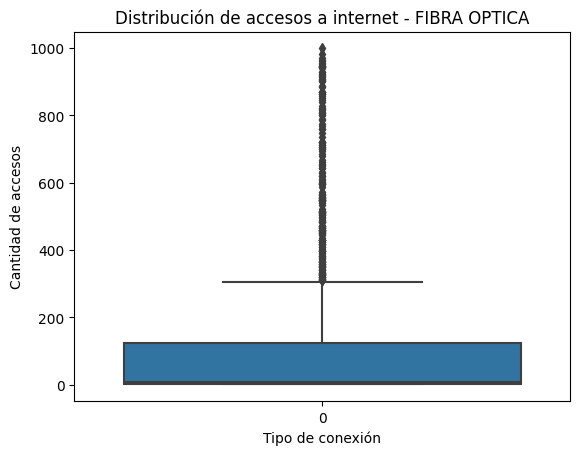

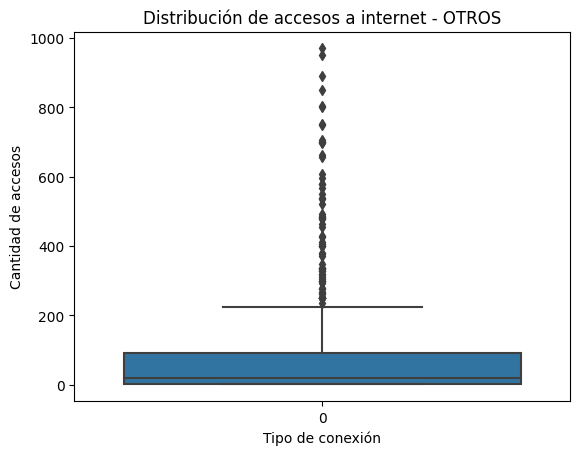

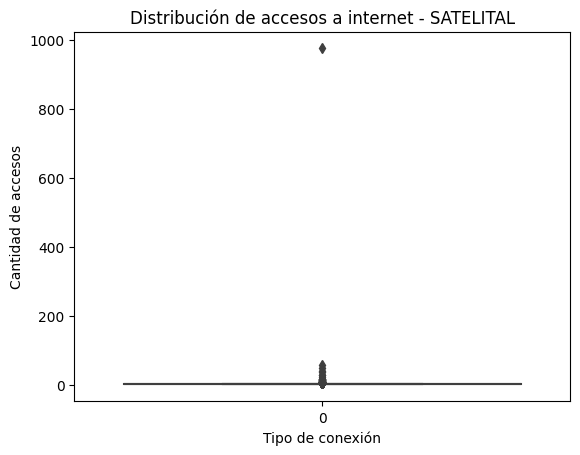

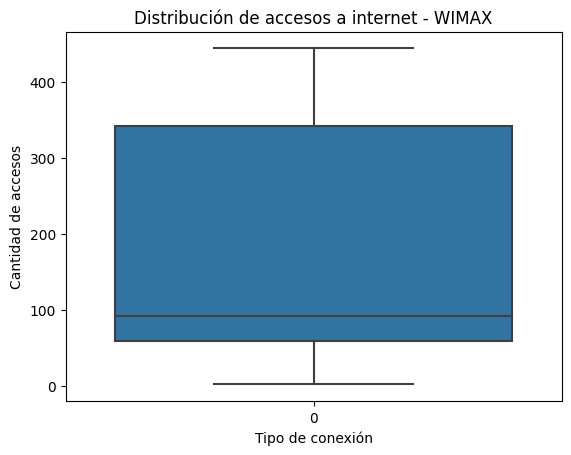

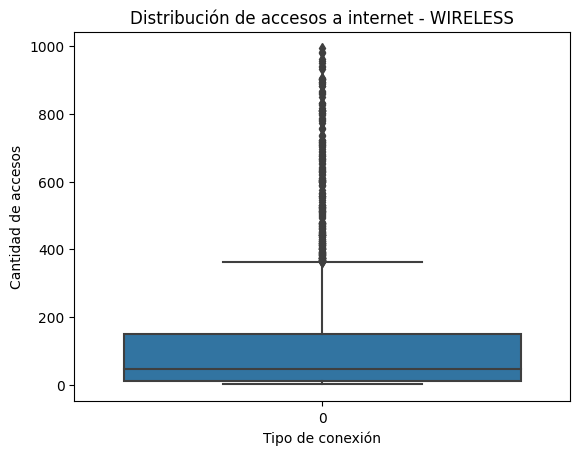

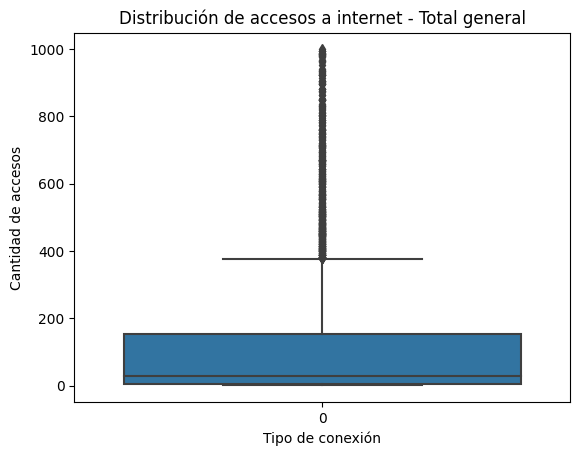

In [19]:
#realizamos la caja de gráficos
columnas_numericas = ['ADSL', 'CABLEMODEM', 'DIAL UP', 'FIBRA OPTICA', 'OTROS', 'SATELITAL', 'WIMAX', 'WIRELESS', 'Total general']

for columna in columnas_numericas:
    plt.figure()  # Crear una nueva figura para cada gráfico
    sns.boxplot(data=acceso_internet_localidad_df[columna])
    plt.xlabel('Tipo de conexión')
    plt.ylabel('Cantidad de accesos')
    plt.title(f'Distribución de accesos a internet - {columna}')
    plt.show()


Se observa que la distribución de la tecnología WiMax es más alta que el resto.
El Internet WiMax es un tipo de conexión que se presenta como alternativa a la fibra o a alguna oferta de ADSL para aquellos lugares en los que no es posible instalar dichas tecnologías. Pero entre CABLEMODEM y ADSL estan casi parejos su distribución ya sea que son los más accesibles segun el internet fijo que brindan los proveedores.

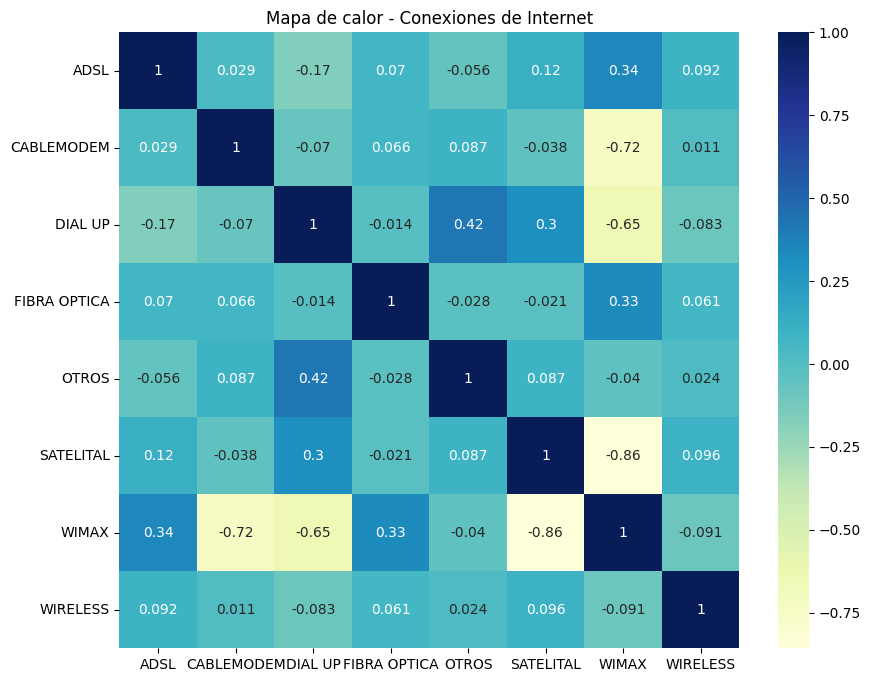

In [20]:
'''Vamos a realizar un mapa de calor para visualizar la correlación entre las diferentes conexiones de Internet en las localidades.
 Las áreas más claras indicarán una mayor correlación positiva entre las conexiones, mientras que las áreas más oscuras indicarán una menor correlación.'''

# Seleccionar las columnas relevantes para el mapa de calor
columnas_conexion = ['ADSL', 'CABLEMODEM', 'DIAL UP', 'FIBRA OPTICA', 'OTROS', 'SATELITAL', 'WIMAX', 'WIRELESS']

# Crear un nuevo dataframe con las columnas seleccionadas
df_conexion = acceso_internet_localidad_df[columnas_conexion]

# Calcular la matriz de correlación entre las columnas
matriz_correlacion = df_conexion.corr()

# Crear el mapa de calor
plt.figure(figsize=(10, 8))
sns.heatmap(matriz_correlacion, annot=True, cmap='YlGnBu')
plt.title('Mapa de calor - Conexiones de Internet')
plt.show()


La intensidad de color en el mapa de calor indica la fuerza y dirección de la correlación entre las conexiones. Las áreas más claras indican una correlación positiva más fuerte, mientras que las áreas más oscuras indican una correlación negativa o débil.
Al observar las áreas claras en el mapa de calor, se puede identificar qué conexiones de Internet están altamente correlacionadas entre sí. Esto puede indicar una tendencia de uso similar o una relación en la infraestructura de red.
Por otro lado, las áreas más oscuras pueden indicar conexiones que no están correlacionadas o tienen una correlación débil. Esto puede sugerir que esas conexiones son menos utilizadas o están influenciadas por diferentes factores.

# Vamos a verificar los top 5 de localidas con su relación de la tecnología que más consume

In [28]:
columnas_conexion = ['ADSL', 'CABLEMODEM', 'DIAL UP', 'FIBRA OPTICA', 'OTROS', 'SATELITAL', 'WIMAX', 'WIRELESS']

# Obtener los valores de las conexiones para cada localidad
valores_conexion = acceso_internet_localidad_df[columnas_conexion].values

# Obtener las etiquetas de las localidades
etiquetas_localidades = acceso_internet_localidad_df['Localidad'].values



datos_localidades_tecnologia = {}
for tecnologia in columnas_conexion:
    # Obtener los índices de las localidades con la tecnología específica
    indices_localidades = acceso_internet_localidad_df[acceso_internet_localidad_df[tecnologia] > 0].index
    
    # Obtener los valores de las conexiones para las localidades con la tecnología específica
    valores_localidades = valores_conexion[indices_localidades]
    
    # Obtener las etiquetas de las localidades con la tecnología específica
    etiquetas_localidades_tecnologia = etiquetas_localidades[indices_localidades]
    
    # Almacenar los datos en el diccionario
    datos_localidades_tecnologia[tecnologia] = {'etiquetas': etiquetas_localidades_tecnologia, 'valores': valores_localidades}



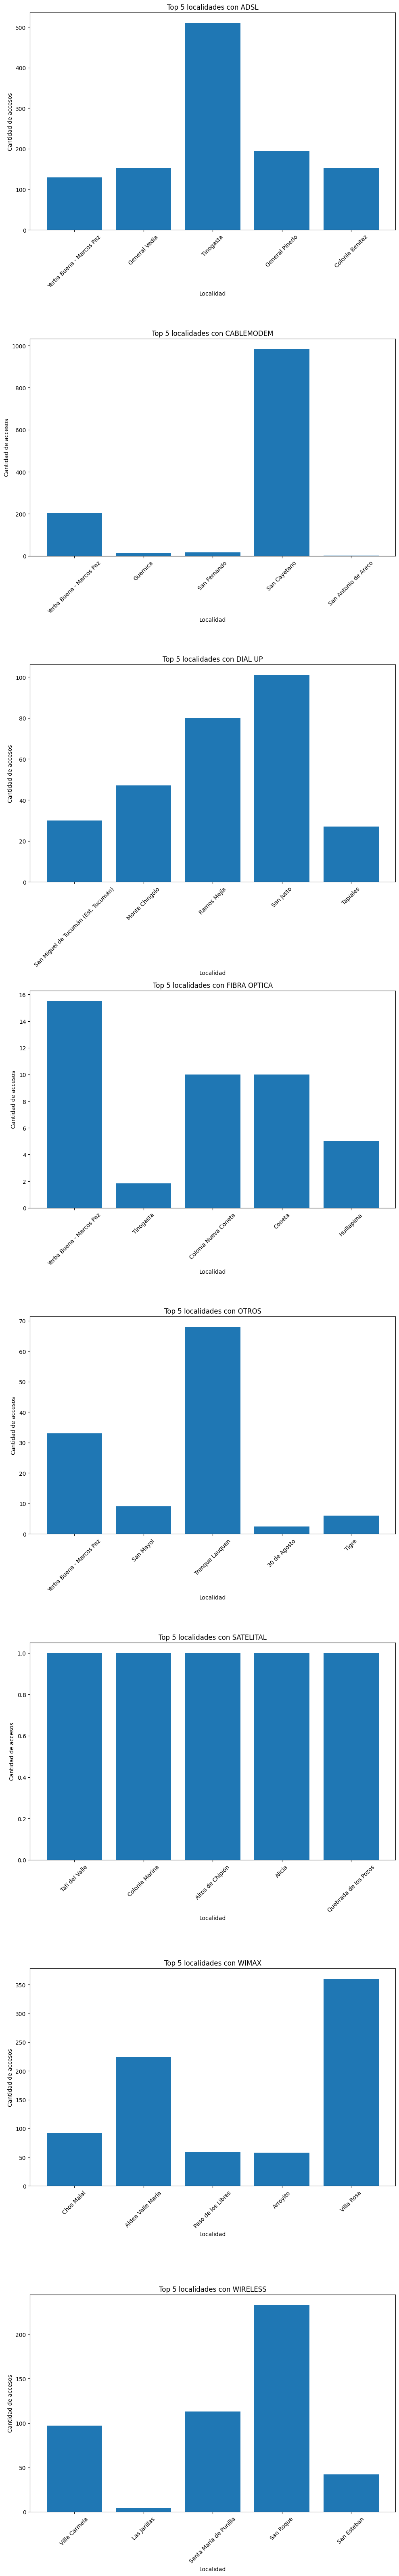

In [29]:

# Configurar los parámetros del gráfico
num_top_localidades = 5
fig, axs = plt.subplots(len(columnas_conexion), 1, figsize=(10, 8 * len(columnas_conexion)))

# Iterar sobre cada tecnología y crear el gráfico correspondiente
for i, tecnologia in enumerate(columnas_conexion):
    # Obtener los datos de las localidades con la tecnología específica
    datos = datos_localidades_tecnologia[tecnologia]
    
    # Obtener los top 5 de localidades por tecnología
    top_localidades_indices = datos['valores'].sum(axis=1).argsort()[-num_top_localidades:][::-1]
    top_localidades_etiquetas = datos['etiquetas'][top_localidades_indices]
    top_localidades_valores = datos['valores'][top_localidades_indices]
    
    # Crear el gráfico de barras para las localidades con la tecnología específica
    axs[i].bar(top_localidades_etiquetas, top_localidades_valores[:, i])
    axs[i].set_xlabel('Localidad')
    axs[i].set_ylabel('Cantidad de accesos')
    axs[i].set_title(f'Top {num_top_localidades} localidades con {tecnologia}')
    axs[i].tick_params(axis='x', rotation=45)

# Ajustar los espacios entre los gráficos
plt.tight_layout()

# Mostrar el gráfico
plt.show()


En general, podemos observar los gráficos top 5 para cada tecnología,  identificamos las localidades líderes en el uso de esas tecnologías específicas. Esto nos  información sobre la infraestructura de conexión a Internet en esas áreas y las preferencias de los usuarios en cuanto a las tecnologías disponibles. 

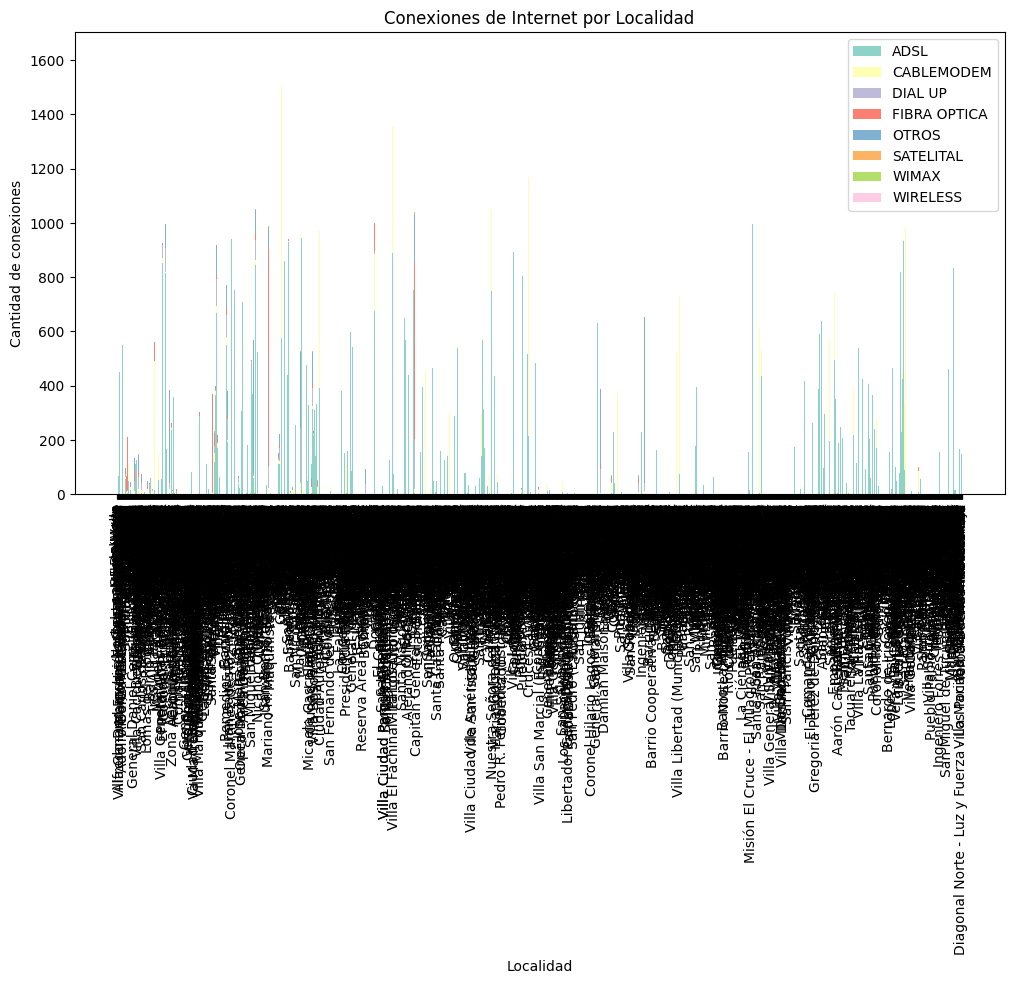

In [372]:
'''Realizamos un grafico de barras apiladas para saber el total de las localidades y el tipo de conexión que usa,
más que todo para tener una visión general de lo que trataremos de analizar'''
# Seleccionar las columnas relevantes para el gráfico de barras apiladas
columnas_conexion = ['ADSL', 'CABLEMODEM', 'DIAL UP', 'FIBRA OPTICA', 'OTROS', 'SATELITAL', 'WIMAX', 'WIRELESS']

# Obtener los valores de las conexiones para cada localidad
valores_conexion = acceso_internet_localidad_df[columnas_conexion].values

# Obtener las etiquetas de las localidades
etiquetas_localidades = acceso_internet_localidad_df['Localidad'].values

# Configurar los colores de las barras
colores = plt.cm.Set3(np.arange(len(columnas_conexion)))

# Crear el gráfico de barras apiladas
plt.figure(figsize=(12, 6))
plt.bar(etiquetas_localidades, valores_conexion[:, 0], color=colores[0], label=columnas_conexion[0])

for i in range(1, len(columnas_conexion)):
    plt.bar(etiquetas_localidades, valores_conexion[:, i], bottom=np.sum(valores_conexion[:, :i], axis=1), color=colores[i], label=columnas_conexion[i])

# Personalizar el gráfico
plt.xlabel('Localidad')
plt.ylabel('Cantidad de conexiones')
plt.title('Conexiones de Internet por Localidad')
plt.xticks(rotation=90)
plt.legend(loc='upper right')

# Mostrar el gráfico
plt.show()

'Se hizo un gráfico donde se pone todas las localidades y sus tipos de concexiones que tiene, en una vista general
observamos que la conexion ADSL es mas consumida, esto debido ya sea por ser económico, más accecible, no interfiere ni se cruzan las líneas teléfonicas y la conexión a intenet', pero tambien se observa que hay indíces más altos de los consumos de CABLEMODEN en ciertas localidades

In [62]:
#funcion para imprimir la cantidad de las conexiones más usadas en Argentina
def contar_conexiones_mas_usadas(df):
    conexiones = ['ADSL', 'CABLEMODEM', 'DIAL UP', 'FIBRA OPTICA', 'OTROS', 'SATELITAL', 'WIMAX', 'WIRELESS']
    suma_conexiones = df[conexiones].sum()
    return suma_conexiones

resultado = contar_conexiones_mas_usadas(acceso_internet_localidad_df)
print(resultado)


ADSL            228646.798
CABLEMODEM      122983.535
DIAL UP          10294.145
FIBRA OPTICA    163325.926
OTROS            53237.376
SATELITAL         3237.000
WIMAX             2107.000
WIRELESS        274662.730
dtype: float64


# Ahora continuamos con el data frame AccesosaInternetfijoporvelocidadbajadayprovincia.csv

In [122]:
'''Vamos a carga nuestro siguiente dataset AccesosaInternetfijoporvelocidadbajadayprovincia.csv'''
conectividad_velocidad_provincia = pd.read_csv('..\data\AccesosaInternetfijoporvelocidadbajadayprovincia.csv')
conectividad_velocidad_provincia.head()

,Unnamed: 0,Año,Trimestre,Provincia,Otros,"0,256 Mbps","0,375 Mbps","0,625 Mbps","0,5 Mbps","0,512 Mbps",...,70 Mbps,71 Mbps,75 Mbps,77 Mbps,78 Mbps,80 Mbps,81 Mbps,83 Mbps,82 Mbps,86 Mbps
0,0,2022,3.0,Buenos Aires,"65,821",19.0,- 0,- 0,"29,774",192,...,"3,163",- 0,98.387,- 0,2,223,- 0,1,- 0,- 0
1,1,2022,3.0,Capital Federal,"105,477",31.0,- 0,- 0,451,35,...,3,- 0,30.482,- 0,- 0,8,- 0,- 0,- 0,- 0
2,5,2022,3.0,Córdoba,"13,873",2.0,- 0,- 0,87,10,...,2,- 0,12.000,- 0,- 0,- 0,- 0,- 0,- 0,- 0
3,12,2022,3.0,Mendoza,"4,771",1.0,- 0,- 0,86,16,...,2,- 0,1.000,- 0,- 0,- 0,- 0,- 0,- 0,- 0
4,13,2022,3.0,Misiones,"8,350",0.0,- 0,- 0,47,4,...,- 0,- 0,553.000,- 0,- 0,- 0,- 0,- 0,- 0,- 0


In [123]:
# Eliminar columnas irrelevantes
conectividad_velocidad_provincia = conectividad_velocidad_provincia.drop(['Unnamed: 0'], axis=1)

In [124]:
#verificamos el número de filas y columnas en el conjunto de datos 
print("Número de filas y columnas:", conectividad_velocidad_provincia.shape)

Número de filas y columnas: (52, 97)


In [112]:
#verificamos las columnas
print('Nombre de Columnas:', conectividad_velocidad_provincia.columns)

Nombre de Columnas: Index(['Año', 'Trimestre', 'Provincia', 'Otros', '0,256 Mbps', '0,375 Mbps',
       '0,625 Mbps', '0,5 Mbps', '0,512 Mbps', '0,75 Mbps', '1 Mbps',
       '1,2 Mbps', '1,25 Mbps', '1,5 Mbps', '2 Mbps', '2,2 Mbps', '2,5 Mbps',
       '6,7 Mbps', '3 Mbps', '3,2 Mbps', '3,3 Mbps', '3,5 Mbps', '4 Mbps',
       '4,5 Mbps', '5 Mbps', '6 Mbps', '6,4 Mbps', '7 Mbps', '7,5 Mbps',
       '8 Mbps', '9 Mbps', '10 Mbps', '10,6 Mbps', '11 Mbps', '12 Mbps',
       '13 Mbps', '14 Mbps', '15 Mbps', '16 Mbps', '17 Mbps', '18 Mbps',
       '19 Mbps', '20 Mbps', '21 Mbps', '22 Mbps', '23 Mbps', '24 Mbps',
       '25 Mbps', '25,1 Mbps', '25,11 Mbps', '25,5 Mbps', '26 Mbps', '28 Mbps',
       '29 Mbps', '30 Mbps', '31 Mbps', '32 Mbps', '34 Mbps', '35 Mbps',
       '36 Mbps', '37 Mbps', '38 Mbps', '39 Mbps', '40 Mbps', '41 Mbps',
       '45 Mbps', '46 Mbps', '47 Mbps', '48 Mbps', '49 Mbps', '50 Mbps',
       '51 Mbps', '52 Mbps', '54 Mbps', '55 Mbps', '56 Mbps', '58 Mbps',
       '59 Mbps'

In [113]:
#examinamos los tipos de datos de cada columna
print("Tipos de datos de las columnas:\n", conectividad_velocidad_provincia.dtypes)


Tipos de datos de las columnas:
 Año             int64
Trimestre     float64
Provincia      object
Otros          object
0,256 Mbps    float64
               ...   
80 Mbps        object
81 Mbps        object
83 Mbps        object
82 Mbps        object
86 Mbps        object
Length: 97, dtype: object


In [114]:
# Lidiar con los valores faltantes
print("Valores faltantes por columna:\n", conectividad_velocidad_provincia.isnull().sum())


Valores faltantes por columna:
 Año           0
Trimestre     0
Provincia     0
Otros         0
0,256 Mbps    0
             ..
80 Mbps       0
81 Mbps       0
83 Mbps       0
82 Mbps       0
86 Mbps       0
Length: 97, dtype: int64


In [81]:
# Reemplazar los valores faltantes por 0
conectividad_velocidad_provincia.fillna(0, inplace=True)

In [115]:
# Verificar los valores faltantes después del reemplazo
print("Valores faltantes por columna:\n", conectividad_velocidad_provincia.isnull().sum())

Valores faltantes por columna:
 Año           0
Trimestre     0
Provincia     0
Otros         0
0,256 Mbps    0
             ..
80 Mbps       0
81 Mbps       0
83 Mbps       0
82 Mbps       0
86 Mbps       0
Length: 97, dtype: int64


In [125]:
# guardamos nuestro dataset
conectividad_velocidad_provincia.to_csv('..\data_clean\conectividad_fijo_velocidad_bajada_provincia.csv')

# Vamos a profundizar realizando sus gráficos conrrespondientes

In [84]:
# Calcula estadísticas descriptivas
estadisticas = conectividad_velocidad_provincia.describe()
print(estadisticas)

               Año   Trimestre
count   481.000000  481.000000
mean   2015.550936    2.494802
std      92.104549    1.123830
min       0.000000    0.000000
25%    2018.000000    1.000000
50%    2020.000000    2.000000
75%    2021.000000    3.000000
max    2022.000000    4.000000


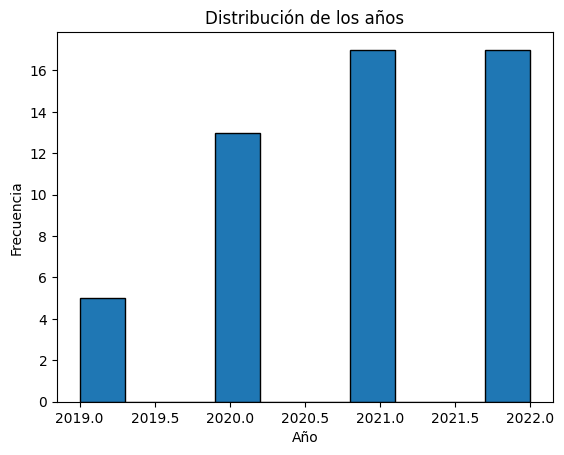

In [381]:
# Crear el histograma
plt.hist(conectividad_velocidad_provincia['Año'], bins=10, edgecolor='black')

# Personalizar el gráfico
plt.xlabel('Año')
plt.ylabel('Frecuencia')
plt.title('Distribución de los años')

# Mostrar el gráfico
plt.show()


La frecuencia de internet se nota un incremento a lo largo de los años, manteniendo su pico más alto duranto los años 2021 y 2022

C:\Users\Ricky Quinteros\AppData\Local\Temp\ipykernel_8892\3341091765.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  conectividad_velocidad_provincia_filtrado['25 Mbps'] = conectividad_velocidad_provincia_filtrado['25 Mbps'].str.replace(',', '.')
C:\Users\Ricky Quinteros\AppData\Local\Temp\ipykernel_8892\3341091765.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  conectividad_velocidad_provincia_filtrado['30 Mbps'] = conectividad_velocidad_provincia_filtrado['30 Mbps'].str.replace(',', '.')
C:\Users

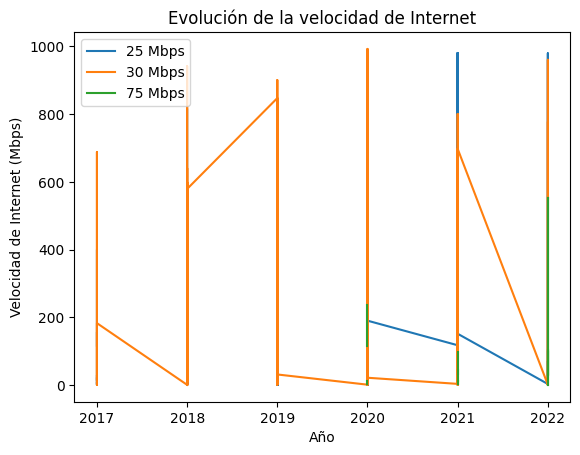

In [96]:
'''El gráfico acontinuación mostrará la evolución del internet a traves de los años desde 2017-2022'''
# Filtrar el dataframe por el rango de años deseado
conectividad_velocidad_provincia_filtrado = conectividad_velocidad_provincia[(conectividad_velocidad_provincia['Año'] >= 2017) & (conectividad_velocidad_provincia['Año'] <= 2022)]

# Reemplazar las comas por puntos en las columnas
conectividad_velocidad_provincia_filtrado['25 Mbps'] = conectividad_velocidad_provincia_filtrado['25 Mbps'].str.replace(',', '.')
conectividad_velocidad_provincia_filtrado['30 Mbps'] = conectividad_velocidad_provincia_filtrado['30 Mbps'].str.replace(',', '.')
conectividad_velocidad_provincia_filtrado['75 Mbps'] = conectividad_velocidad_provincia_filtrado['75 Mbps'].str.replace(',', '.')

# Convertir las columnas a tipo float con manejo de errores
def convert_to_float(value):
    try:
        return float(value)
    except ValueError:
        return np.nan

conectividad_velocidad_provincia_filtrado['25 Mbps'] = conectividad_velocidad_provincia_filtrado['25 Mbps'].apply(convert_to_float)
conectividad_velocidad_provincia_filtrado['30 Mbps'] = conectividad_velocidad_provincia_filtrado['30 Mbps'].apply(convert_to_float)
conectividad_velocidad_provincia_filtrado['75 Mbps'] = conectividad_velocidad_provincia_filtrado['75 Mbps'].apply(convert_to_float)

# Graficar la evolución de las velocidades de Internet a lo largo del tiempo
conectividad_velocidad_provincia_filtrado.plot(x='Año', y=['25 Mbps', '30 Mbps', '75 Mbps'], kind='line')
plt.xlabel('Año')
plt.ylabel('Velocidad de Internet (Mbps)')
plt.title('Evolución de la velocidad de Internet')
plt.legend()
plt.show()


De todas las velocidades de internet que hay las más consumidad es de 30 Mbps hay varios factores de que la población considere mantener ese plan ya por lo economico y accesible de acuerdo a los lugares demograficos de la zonas


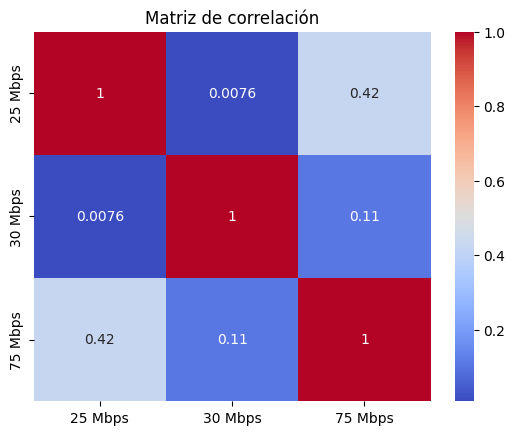

In [103]:
'''El mapa de calor que se mostrará representa la matriz de correlación entre las velocidades de conexión a internet de 25 Mbps, 30 Mbps y 75 Mbps '''
# Reemplazar '-' por NaN en las columnas de interés
columnas_interes = ['25 Mbps', '30 Mbps', '75 Mbps']
for columna in columnas_interes:
    conectividad_velocidad_provincia[columna] = conectividad_velocidad_provincia[columna].replace('- 0', float('nan'))

# Reemplazar comas por puntos decimales en las columnas de interés
conectividad_velocidad_provincia[columnas_interes] = conectividad_velocidad_provincia[columnas_interes].apply(lambda x: x.str.replace(',', '.')).astype(float)

# Eliminar filas con valores no válidos o faltantes
conectividad_velocidad_provincia.dropna(subset=columnas_interes, inplace=True)

# Cálculo de la matriz de correlación
matriz_correlacion = conectividad_velocidad_provincia[columnas_interes].corr()

# Gráfico de mapa de calor de la matriz de correlación
sns.heatmap(matriz_correlacion, annot=True, cmap='coolwarm')
plt.title('Matriz de correlación')
plt.show()


Conclución: Identificar las correlaciones positivas: Si hay valores cercanos a 1 en la matriz de correlación, indica que las velocidades de conexión de 25 Mbps, 30 Mbps y 75 Mbps están altamente correlacionadas positivamente. Esto significa que si una velocidad aumenta, es probable que las otras también aumenten en proporción.

Identificar las correlaciones negativas: Si hay valores cercanos a -1 en la matriz de correlación, indica una correlación negativa entre las velocidades de conexión. Esto significa que si una velocidad aumenta, es probable que las otras disminuyan en proporción.

Identificar la fuerza de las correlaciones: Los valores más cercanos a 1 o -1 indican una correlación más fuerte, mientras que los valores cercanos a 0 indican una correlación más débil.

Identificar patrones en la matriz de correlación: Puedes observar patrones de correlación entre las velocidades de conexión, como por ejemplo, si hay un grupo de velocidades que están altamente correlacionadas entre sí y menos correlacionadas con otras velocidades.

En resumen, el análisis de correlación nos esta dando entender cómo están relacionadas entre sí las velocidades de conexión a Internet y detectar posibles patrones o dependencias entre ellas. Esto puede proporcionar información valiosa para tomar decisiones relacionadas con la mejora de la infraestructura de Internet y la planificación de servicios.

# continuamos con el siguiente dataset AccesosaInternetfijoporvelocidaddebajadaylocalidad.csv

In [31]:
# cargamos nuestro archivos
conectividad_velocidad_localidad = pd.read_csv('..\data\AccesosaInternetfijoporvelocidaddebajadaylocalidad.csv')
conectividad_velocidad_localidad.head()

,Provincia,Partido,Localidad,Link Indec,Otros,"0,256 mbps","0,375 mbps","0,5 mbps","0,512 mbps","0,625 mbps",...,75 mbps,78 mbps,80 mbps,82 mbps,83 mbps,85 mbps,90 mbps,92 mbps,95 mbps,100 mbps
0,BUENOS AIRES,25 de Mayo,25 de Mayo,6854100,NaN,NaN,NaN,2,NaN,NaN,...,NaN,NaN,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BUENOS AIRES,25 de Mayo,Agustín Mosconi,6854010,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,BUENOS AIRES,25 de Mayo,Del Valle,6854020,NaN,NaN,NaN,1,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,BUENOS AIRES,25 de Mayo,Ernestina,6854030,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,BUENOS AIRES,25 de Mayo,Gobernador Ugarte,6854040,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [32]:
#verificamos el número de filas y columnas en el conjunto de datos 
print("Número de filas y columnas:", conectividad_velocidad_localidad.shape)

Número de filas y columnas: (3098, 83)


In [33]:
#verificamos las columnas
print("Nombres de columnas:", conectividad_velocidad_localidad.columns)

Nombres de columnas: Index(['Provincia', 'Partido', 'Localidad', 'Link Indec', 'Otros',
       '0,256 mbps', '0,375 mbps', '0,5 mbps', '0,512 mbps', '0,625 mbps',
       '0,75 mbps', '1 mbps', '1,25 mbps', '1,5 mbps', '2 mbps', '2,2 mbps',
       '2,5 mbps', '3 mbps', '3,3 mbps', '3,5 mbps', '4 mbps', '4,5 mbps',
       '5 mbps', '6 mbps', '6,4 mbps', '7 mbps', '7,5 mbps', '8 mbps',
       '9 mbps', '10 mbps', '11 mbps', '12 mbps', '13 mbps', '14 mbps',
       '15 mbps', '16 mbps', '17 mbps', '18 mbps', '19 mbps', '20 mbps',
       '21 mbps', '22 mbps', '23 mbps', '24 mbps', '25 mbps', '25,1 mbps',
       '25,11 mbps', '25,5 mbps', '26 mbps', '30 mbps', '31 mbps', '32 mbps',
       '34 mbps', '35 mbps', '36 mbps', '38 mbps', '39 mbps', '40 mbps',
       '41 mbps', '45 mbps', '46 mbps', '49 mbps', '50 mbps', '55 mbps',
       '58 mbps', '59 mbps', '60 mbps', '61 mbps', '62 mbps', '64 mbps',
       '65 mbps', '66 mbps', '70 mbps', '75 mbps', '78 mbps', '80 mbps',
       '82 mbps', '83 mb

In [34]:
#examinamos los tipos de datos de cada columna
print("Tipos de datos de las columnas:\n", conectividad_velocidad_localidad.dtypes)

Tipos de datos de las columnas:
 Provincia      object
Partido        object
Localidad      object
Link Indec     object
Otros          object
               ...   
85 mbps       float64
90 mbps       float64
92 mbps       float64
95 mbps       float64
100 mbps       object
Length: 83, dtype: object


In [35]:
# Lidiar con los valores faltantes
print("Valores faltantes por columna:\n", conectividad_velocidad_localidad.isnull().sum())

Valores faltantes por columna:
 Provincia        0
Partido          0
Localidad        0
Link Indec       0
Otros         2142
              ... 
85 mbps       3097
90 mbps       3096
92 mbps       3096
95 mbps       3097
100 mbps      2545
Length: 83, dtype: int64


In [36]:
'''al ver demasiado valores nulos en las columnas, ademas de que el data set contiene valores que son de suma importancia,
vamos a realizar la imputación de los datos.
vamos a realizar 
 la imputación por regresión o la imputación por vecinos más cercanos (KNN imputation). 
 Estas técnicas pueden proporcionar una estimación más precisa de los valores faltantes al tener en cuenta la relación entre las variables 
 o la similitud entre las observaciones.'''

# Copiar el dataframe original
conectividad_velocidad_localidad_imputado = conectividad_velocidad_localidad.copy()

# Definir las columnas a imputar
columnas_imputar = ['Otros', '0,256 mbps', '0,375 mbps', '0,5 mbps', '0,512 mbps', '0,625 mbps', 
                    '0,75 mbps', '1 mbps', '1,25 mbps', '1,5 mbps', '2 mbps', '2,2 mbps', '2,5 mbps',
                      '3 mbps', '3,3 mbps', '3,5 mbps', '4 mbps', '4,5 mbps', '5 mbps', '6 mbps', '6,4 mbps',
                        '7 mbps', '7,5 mbps', '8 mbps', '9 mbps', '10 mbps', '11 mbps', '12 mbps', '13 mbps', 
                        '14 mbps', '15 mbps', '16 mbps', '17 mbps', '18 mbps', '19 mbps', '20 mbps', '21 mbps',
                          '22 mbps', '23 mbps', '24 mbps', '25 mbps', '25,1 mbps', '25,11 mbps', '25,5 mbps', 
                          '26 mbps', '30 mbps', '31 mbps', '32 mbps', '34 mbps', '35 mbps', '36 mbps', '38 mbps',
                            '39 mbps', '40 mbps', '41 mbps', '45 mbps', '46 mbps', '49 mbps', '50 mbps', '55 mbps',
                              '58 mbps', '59 mbps', '60 mbps', '61 mbps', '62 mbps', '64 mbps', '65 mbps', '66 mbps',
                                '70 mbps', '75 mbps', '78 mbps', '80 mbps', '82 mbps', '83 mbps', '85 mbps', '90 mbps', 
                                '92 mbps', '95 mbps', '100 mbps']

conectividad_velocidad_localidad_imputado[columnas_imputar] = conectividad_velocidad_localidad_imputado[columnas_imputar].replace(',', '.', regex=True)


# Aplicar la imputación en las columnas seleccionadas
imputer = KNN()
conectividad_velocidad_localidad_imputado[columnas_imputar] = imputer.fit_transform(conectividad_velocidad_localidad_imputado[columnas_imputar])



Imputing row 1/3098 with 65 missing, elapsed time: 6.548
Imputing row 101/3098 with 76 missing, elapsed time: 6.695
Imputing row 201/3098 with 62 missing, elapsed time: 6.869
Imputing row 301/3098 with 77 missing, elapsed time: 7.033
Imputing row 401/3098 with 78 missing, elapsed time: 7.177
Imputing row 501/3098 with 71 missing, elapsed time: 7.347
Imputing row 601/3098 with 73 missing, elapsed time: 7.554
Imputing row 701/3098 with 71 missing, elapsed time: 7.749
Imputing row 801/3098 with 69 missing, elapsed time: 7.960
Imputing row 901/3098 with 78 missing, elapsed time: 8.124
Imputing row 1001/3098 with 75 missing, elapsed time: 8.298
Imputing row 1101/3098 with 57 missing, elapsed time: 8.464
Imputing row 1201/3098 with 77 missing, elapsed time: 8.740
Imputing row 1301/3098 with 78 missing, elapsed time: 8.968
Imputing row 1401/3098 with 76 missing, elapsed time: 9.219
Imputing row 1501/3098 with 78 missing, elapsed time: 9.448
Imputing row 1601/3098 with 77 missing, elapsed time

In [37]:
print("Valores nulos después de la imputación:\n", conectividad_velocidad_localidad_imputado[columnas_imputar].isnull().sum())


Valores nulos después de la imputación:
 Otros         0
0,256 mbps    0
0,375 mbps    0
0,5 mbps      0
0,512 mbps    0
             ..
85 mbps       0
90 mbps       0
92 mbps       0
95 mbps       0
100 mbps      0
Length: 79, dtype: int64


In [38]:
print("Estadísticas descriptivas antes de la imputación:\n", conectividad_velocidad_localidad[columnas_imputar].describe())
print("Estadísticas descriptivas después de la imputación:\n", conectividad_velocidad_localidad_imputado[columnas_imputar].describe())


Estadísticas descriptivas antes de la imputación:
        0,256 mbps  0,375 mbps  0,512 mbps  0,625 mbps  1,25 mbps  2,2 mbps  \
count   29.000000         1.0  524.000000         1.0        1.0       1.0   
mean     3.379310       225.0    2.173664       111.0       25.0      26.0   
std      6.411005         NaN    4.822112         NaN        NaN       NaN   
min      1.000000       225.0    1.000000       111.0       25.0      26.0   
25%      1.000000       225.0    1.000000       111.0       25.0      26.0   
50%      1.000000       225.0    1.000000       111.0       25.0      26.0   
75%      3.000000       225.0    1.000000       111.0       25.0      26.0   
max     31.000000       225.0   61.000000       111.0       25.0      26.0   

         2,5 mbps  3,3 mbps  4,5 mbps  6,4 mbps  ...    65 mbps  66 mbps  \
count    3.000000       1.0       1.0       1.0  ...   2.000000      1.0   
mean    59.666667       6.0      65.0      13.0  ...   7.000000      1.0   
std     47.648015 

In [39]:
# Redondear los valores imputados a dos decimales
conectividad_velocidad_localidad_imputado[columnas_imputar] = conectividad_velocidad_localidad_imputado[columnas_imputar].apply(lambda x: round(x, 2))


In [40]:
#verificamos nuestro datos ahora
conectividad_velocidad_localidad_imputado.head()

,Provincia,Partido,Localidad,Link Indec,Otros,"0,256 mbps","0,375 mbps","0,5 mbps","0,512 mbps","0,625 mbps",...,75 mbps,78 mbps,80 mbps,82 mbps,83 mbps,85 mbps,90 mbps,92 mbps,95 mbps,100 mbps
0,BUENOS AIRES,25 de Mayo,25 de Mayo,6854100,2.0,1.24,225.0,2.0,1.00,111.0,...,39.93,2.0,9.00,1.0,1.0,14.0,2.37,1.45,1.0,39.69
1,BUENOS AIRES,25 de Mayo,Agustín Mosconi,6854010,82.0,2.01,0.0,1.0,1.00,0.0,...,20.58,2.0,307.25,1.0,0.0,14.0,2.99,1.13,1.0,171.19
2,BUENOS AIRES,25 de Mayo,Del Valle,6854020,35.0,1.02,225.0,1.0,1.40,111.0,...,12.00,2.0,97.72,1.0,1.0,14.0,2.89,1.84,1.0,275.20
3,BUENOS AIRES,25 de Mayo,Ernestina,6854030,2.0,1.34,0.0,1.0,1.33,0.0,...,269.00,2.0,24.21,1.0,0.0,14.0,2.16,1.71,1.0,3.15
4,BUENOS AIRES,25 de Mayo,Gobernador Ugarte,6854040,131.4,2.36,225.0,2.0,3.00,111.0,...,9.50,2.0,122.35,1.0,0.0,14.0,2.97,1.18,1.0,153.60


In [41]:
conectividad_velocidad_localidad_imputado.describe()

,Otros,"0,256 mbps","0,375 mbps","0,5 mbps","0,512 mbps","0,625 mbps","0,75 mbps",1 mbps,"1,25 mbps","1,5 mbps",...,75 mbps,78 mbps,80 mbps,82 mbps,83 mbps,85 mbps,90 mbps,92 mbps,95 mbps,100 mbps
count,3098.000000,3098.000000,3098.000000,3098.000000,3098.000000,3098.000000,3098.000000,3098.000000,3098.000000,3098.000000,...,3098.000000,3098.000000,3098.000000,3098.000000,3098.000000,3098.000000,3098.000000,3098.000000,3098.000000,3098.000000
mean,52.526072,3.310136,99.790187,3.196685,1.995491,49.229826,19.428196,50.113880,11.087799,89.830058,...,166.826130,1.891543,113.713915,0.913170,0.207553,13.041963,2.268922,1.479881,0.998063,129.648425
std,97.511552,3.220006,111.797787,11.854993,2.930751,55.153575,43.007559,77.531649,12.421976,78.722440,...,175.528377,0.453009,176.102797,0.281632,0.405621,3.535353,0.726604,0.336681,0.043973,178.426662
min,-601.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.200000,1.480000,0.000000,1.000000,1.000000,0.000000,3.840000,7.000000,0.000000,40.290000,...,18.310000,2.000000,13.460000,1.000000,0.000000,14.000000,1.782500,1.150000,1.000000,5.370000
50%,15.000000,2.375000,0.000000,1.500000,1.000000,0.000000,8.600000,21.800000,0.000000,55.095000,...,104.205000,2.000000,43.045000,1.000000,0.000000,14.000000,2.510000,1.520000,1.000000,54.560000
75%,61.200000,3.687500,225.000000,2.200000,2.000000,111.000000,19.885000,65.000000,25.000000,115.500000,...,267.105000,2.000000,120.000000,1.000000,0.000000,14.000000,2.940000,1.730000,1.000000,188.565000
max,970.000000,31.000000,225.000000,451.000000,61.000000,111.000000,908.000000,766.000000,25.000000,349.000000,...,952.000000,2.000000,952.000000,1.000000,1.000000,14.000000,3.000000,2.000000,1.000000,988.000000


In [162]:
#guardamos nuestrodataset
conectividad_velocidad_localidad_imputado.to_csv('..\data_clean\conectividad_fijo_debajada_localidad.csv')

# Procedemos a realizar el gráfico respéctivo

In [51]:
#creamos un  nuevo dataframe que contenga solo estas columnas seleccionadas.
categorias = ['0,256 mbps', '0,375 mbps', '0,5 mbps', '0,512 mbps', '0,625 mbps', '0,75 mbps',
               '1 mbps', '1,25 mbps', '1,5 mbps', '2 mbps', '2,2 mbps', '2,5 mbps', '3 mbps',
               '3,3 mbps', '3,5 mbps', '4 mbps', '4,5 mbps', '5 mbps', '6 mbps', '6,4 mbps',
               '7 mbps', '7,5 mbps', '8 mbps', '9 mbps', '10 mbps', '11 mbps', '12 mbps',
               '13 mbps', '14 mbps', '15 mbps', '16 mbps', '17 mbps', '18 mbps', '19 mbps',
               '20 mbps', '21 mbps', '22 mbps', '23 mbps', '24 mbps', '25 mbps', '25,1 mbps',
               '25,11 mbps', '25,5 mbps', '26 mbps', '30 mbps', '31 mbps', '32 mbps', '34 mbps',
               '35 mbps', '36 mbps', '38 mbps', '39 mbps', '40 mbps', '41 mbps', '45 mbps',
               '46 mbps', '49 mbps', '50 mbps', '55 mbps', '58 mbps', '59 mbps', '60 mbps',
               '61 mbps', '62 mbps', '64 mbps', '65 mbps', '66 mbps', '70 mbps', '75 mbps',
               '78 mbps', '80 mbps', '82 mbps', '83 mbps', '85 mbps', '90 mbps', '92 mbps',
               '95 mbps', '100 mbps']

# Obtener los valores promedio de velocidad para cada categoría
valores_velocidad = conectividad_velocidad_localidad_imputado[categorias].mean()


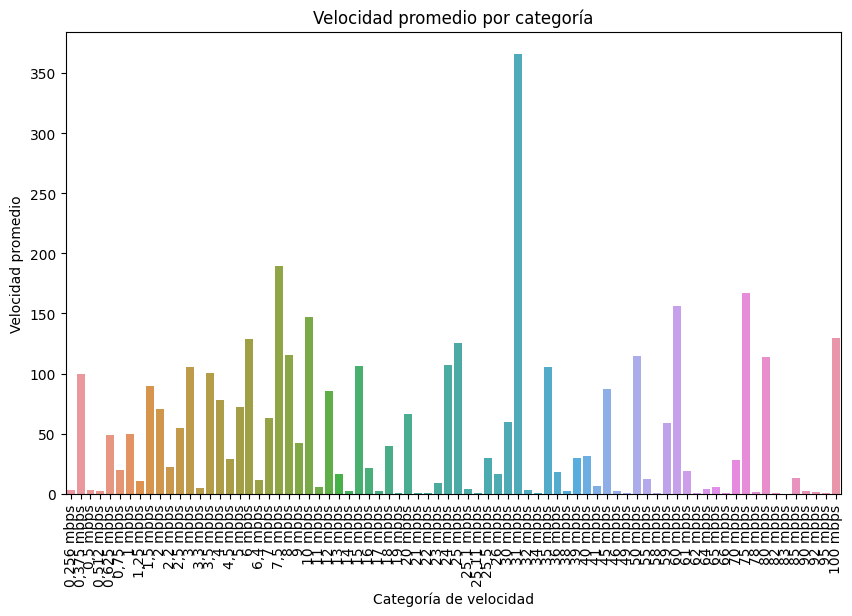

In [52]:
# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(x=categorias, y=valores_velocidad)
plt.xlabel('Categoría de velocidad')
plt.ylabel('Velocidad promedio')
plt.title('Velocidad promedio por categoría')
plt.xticks(rotation=90)
plt.show()

Como observamos en el conectividad_velocidad_provincia_filtrado y este conectividad_velocidad_localidad_imputado, la velocidad más consumida de internet es de 30 Mbps, ademas se tomó la decisión de imputar los datos en conectividad_velocidad_localidad_imputado tomando los valores vecinos cercando para poder llegar a realizar la comparación de los datos con el dataset anterior

# Ahora procedemos con el siguiente dataset ConectividadalserviciodeInternet.csv

In [54]:
#cargamos el archivo
conectividad_servicio_internet = pd.read_csv('..\data\ConectividadalserviciodeInternet.csv')
conectividad_servicio_internet.head()

,provincia,Partido,Localidad,Unnamed: 3,Unnamed: 4,CABLEMODEM,DIALUP,Unnamed: 7,Unnamed: 8,WIRELESS,TELEFONIAFIJA,Unnamed: 11,Unnamed: 12,link,Latitud,Unnamed: 15
0,NaN,Bahía Blanca,Villa Bordeau,0.0,NaN,--,--,--,NaN,--,--,NaN,SI,6056020.0,"-38,6472605094596",NaN
1,BUENOS AIRES,NaN,NaN,0.0,--,NaN,NaN,--,--,NaN,NaN,--,--,NaN,"-38,7765069529222","-62,1851833537179"
2,BUENOS AIRES,NaN,Balcarce,38376.0,SI,NaN,SI,SI,--,NaN,NaN,SI,SI,6063010.0,NaN,"-58,2551665841248"
3,BUENOS AIRES,NaN,NaN,337.0,--,NaN,NaN,--,--,NaN,SI,NaN,--,6063020.0,"-37,9412057603",NaN
4,BUENOS AIRES,Balcarce,NaN,374.0,--,--,NaN,SI,--,SI,SI,SI,NaN,6063030.0,"-37,6254980210026","-58,7461862359423"


In [178]:
#verificamos el número de filas y columnas en el conjunto de datos 
print("Número de filas y columnas:", conectividad_servicio_internet.shape)

Número de filas y columnas: (4312, 16)


In [179]:
#verificamos las columnas
print("Nombres de columnas:", conectividad_servicio_internet.columns)

Nombres de columnas: Index(['provincia', 'Partido', 'Localidad', 'Unnamed: 3', 'Unnamed: 4',
       'CABLEMODEM', 'DIALUP', 'Unnamed: 7', 'Unnamed: 8', 'WIRELESS',
       'TELEFONIAFIJA', 'Unnamed: 11', 'Unnamed: 12', 'link', 'Latitud',
       'Unnamed: 15'],
      dtype='object')


In [56]:
# Lista de columnas a eliminar
columnas_a_eliminar = ['Unnamed: 3', 'Unnamed: 4', 'Unnamed: 7', 'Unnamed: 8',
                       'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 15']

# Eliminar las columnas del DataFrame
conectividad_servicio_internet = conectividad_servicio_internet.drop(columns=columnas_a_eliminar)


In [57]:
#examinamos los tipos de datos de cada columna
print("Tipos de datos de las columnas:\n", conectividad_servicio_internet.dtypes)

Tipos de datos de las columnas:
 provincia         object
Partido           object
Localidad         object
CABLEMODEM        object
DIALUP            object
WIRELESS          object
TELEFONIAFIJA     object
link             float64
Latitud           object
dtype: object


In [182]:
# Lidiar con los valores faltantes
print("Valores faltantes por columna:\n", conectividad_servicio_internet.isnull().sum())

Valores faltantes por columna:
 provincia        1441
Partido          1446
Localidad        1428
CABLEMODEM       1450
DIALUP           1430
WIRELESS         1448
TELEFONIAFIJA    1439
link             1447
Latitud          1440
dtype: int64


# Observamos que los datos que faltan es demasiado, y no contamos con mucha información como para poder reemplazar valores y sacar una conclución, así que por ahora no tomaremos en cuenta este dataset

In [58]:
#Reemplazamos los valores nulos por desconocidos para las columnas seleccionada
conectividad_servicio_internet['CABLEMODEM'].fillna('Desconocido', inplace=True)
conectividad_servicio_internet['DIALUP'].fillna('Desconocido', inplace=True)
conectividad_servicio_internet['WIRELESS'].fillna('Desconocido', inplace=True)
conectividad_servicio_internet['TELEFONIAFIJA'].fillna('Desconocido', inplace=True)


In [59]:
#tratamos de sacar la mediada de la columna link
link_mean = conectividad_servicio_internet['link'].mean()
conectividad_servicio_internet['link'].fillna(link_mean, inplace=True)


In [60]:
#reeemplazamos los valores nulos para la columna Latitud
conectividad_servicio_internet['Latitud'].fillna(method='ffill', inplace=True)


In [61]:
#verificamos las 5 primeras columanas
conectividad_servicio_internet.head()

,provincia,Partido,Localidad,CABLEMODEM,DIALUP,WIRELESS,TELEFONIAFIJA,link,Latitud
0,NaN,Bahía Blanca,Villa Bordeau,--,--,--,--,6.056020e+06,"-38,6472605094596"
1,BUENOS AIRES,NaN,NaN,Desconocido,Desconocido,Desconocido,Desconocido,3.924052e+07,"-38,7765069529222"
2,BUENOS AIRES,NaN,Balcarce,Desconocido,SI,Desconocido,Desconocido,6.063010e+06,"-38,7765069529222"
3,BUENOS AIRES,NaN,NaN,Desconocido,Desconocido,Desconocido,SI,6.063020e+06,"-37,9412057603"
4,BUENOS AIRES,Balcarce,NaN,--,Desconocido,SI,SI,6.063030e+06,"-37,6254980210026"


In [188]:
#guardamos nuestro dato
conectividad_servicio_internet.to_csv('..\data_clean\conectividad_servicio_internet.csv')

In [62]:
conectividad_servicio_internet.describe()

,link
count,4.312000e+03
mean,3.924052e+07
std,2.402308e+07
min,2.000010e+06
25%,1.415403e+07
50%,3.924052e+07
75%,5.009105e+07
max,9.401401e+07


# continuamos con el siguiente dataset historico_velocidad_internet (1).csv

In [190]:
#cargamos nuestros datos
historico_velocidad_internet = pd.read_csv('..\data\historico_velocidad_internet (1).csv')
historico_velocidad_internet.head()

,Año,Trimestre,Provincia,Mbps (Media de bajada),Unnamed: 4,Unnamed: 5
0,2022,3,Buenos Aires,70,NaN,NaN
1,2022,3,Capital Federal,101,NaN,NaN
2,2022,3,Catamarca,61,NaN,NaN
3,2022,3,Chaco,53,NaN,NaN
4,2022,3,Chubut,16,NaN,NaN


In [191]:
#verificamos el número de filas y columnas en el conjunto de datos 
print("Número de filas y columnas:", historico_velocidad_internet.shape)

Número de filas y columnas: (840, 6)


In [192]:
#verificamos las columnas
print("Nombres de columnas:", historico_velocidad_internet.columns)

Nombres de columnas: Index(['Año', 'Trimestre', 'Provincia', 'Mbps (Media de bajada)', 'Unnamed: 4',
       'Unnamed: 5'],
      dtype='object')


In [196]:
columnas_eliminar = ['Unnamed: 4', 'Unnamed: 5']

# Eliminar las columnas del DataFrame
historico_velocidad_internet = historico_velocidad_internet.drop(columns=columnas_eliminar)

In [197]:
#examinamos los tipos de datos de cada columna
print("Tipos de datos de las columnas:\n", historico_velocidad_internet.dtypes)

Tipos de datos de las columnas:
 Año                        int64
Trimestre                  int64
Provincia                 object
Mbps (Media de bajada)     int64
dtype: object


In [198]:
# Lidiar con los valores faltantes
print("Valores faltantes por columna:\n", historico_velocidad_internet.isnull().sum())

Valores faltantes por columna:
 Año                       0
Trimestre                 0
Provincia                 0
Mbps (Media de bajada)    0
dtype: int64


In [383]:
historico_velocidad_internet.describe()

,Año,Trimestre,Mbps (Media de bajada)
count,840.000000,840.000000,840.000000
mean,2017.885714,2.457143,13.841667
std,2.528745,1.105009,14.669499
min,2014.000000,1.000000,3.000000
25%,2016.000000,1.000000,4.000000
50%,2018.000000,2.000000,7.000000
75%,2020.000000,3.000000,18.000000
max,2022.000000,4.000000,101.000000


'estos resultados nos dan una visión general de la distribución de la velocidad de bajada a lo largo del tiempo. Podemos observar la variabilidad en los valores de velocidad y cómo se distribuyen en los diferentes trimestres y años.'

In [200]:
#guardamos nuestro dato
historico_velocidad_internet.to_csv('..\data_clean\historico_velocidad_internet(1).csv')

# Vamos a realizar un gráfico de de línea temporal donde se muestre la velocidad promedio de bajado a lo largo del tiempo

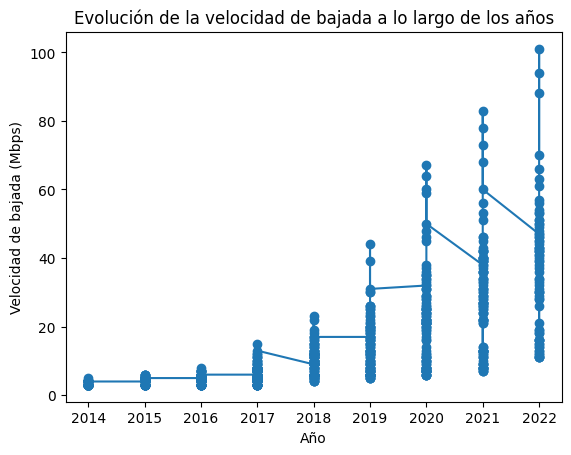

In [384]:
# Extraer los datos relevantes del dataframe
años = historico_velocidad_internet['Año']
velocidad_bajada = historico_velocidad_internet['Mbps (Media de bajada)']

# Crear el gráfico de línea
plt.plot(años, velocidad_bajada, marker='o')

# Personalizar el gráfico
plt.xlabel('Año')
plt.ylabel('Velocidad de bajada (Mbps)')
plt.title('Evolución de la velocidad de bajada a lo largo de los años')

# Mostrar el gráfico
plt.show()


Tendencia general: Observamos si hay una tendencia ascendente, descendente o estable en la velocidad de bajada a lo largo de los años. Esto puede indicar mejoras en la infraestructura de Internet, actualizaciones tecnológicas o cambios en las políticas del proveedor de servicios.

Puntos destacados: Identificar picos o puntos destacados en la velocidad de bajada que podrían estar asociados con eventos o cambios significativos en el campo de las telecomunicaciones.

Comparación entre años: Comparar la velocidad de bajada en diferentes años para determinar si ha habido un aumento o disminución significativa en la velocidad a lo largo del tiempo.

Identificación de anomalías: Buscar posibles anomalías o fluctuaciones inusuales en la velocidad de bajada que puedan requerir una mayor investigación o análisis.

# ¿Qué significa bajada Mbps de bajada ?
## La velocidad de bajada es la velocidad de descarga de datos, el tiempo que tarda la información en llegar a nosotros desde Internet.

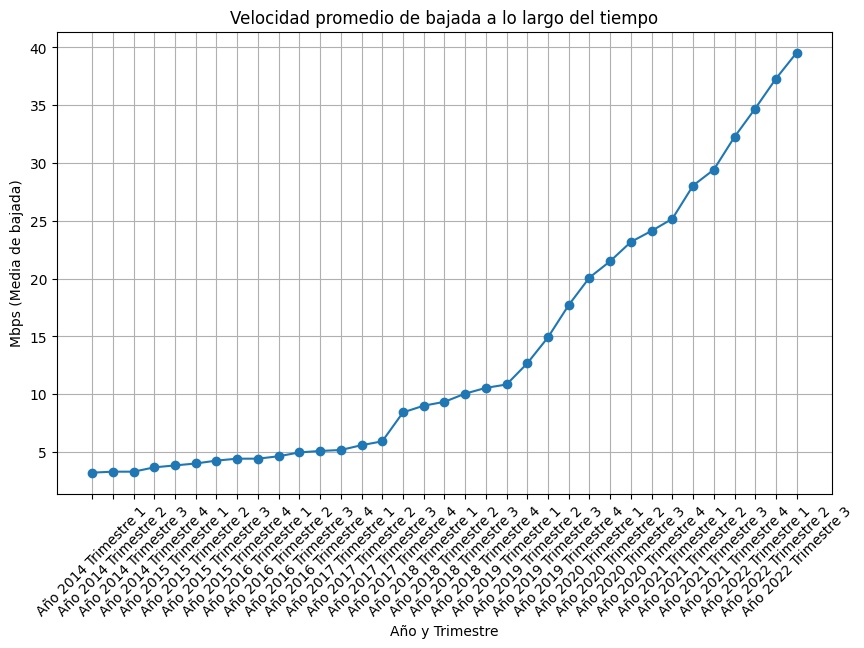

In [199]:
'''Agrupamos los datos por año y trimestre y calcula la velocidad promedio de bajada
 para cada combinación utilizando el método groupby() y mean():'''
velocidad_promedio = historico_velocidad_internet.groupby(['Año', 'Trimestre'])['Mbps (Media de bajada)'].mean()

#creamos una etiqueta
etiquetas_x = [f"Año {a} Trimestre {t}" for a, t in velocidad_promedio.index]


plt.figure(figsize=(10, 6))  # Tamaño del gráfico (opcional)
plt.plot(etiquetas_x, velocidad_promedio.values, marker='o')
plt.xlabel('Año y Trimestre')
plt.ylabel('Mbps (Media de bajada)')
plt.title('Velocidad promedio de bajada a lo largo del tiempo')
plt.xticks(rotation=45)  # Rotación de las etiquetas del eje x (opcional)
plt.grid(True)  # Mostrar cuadrícula (opcional)
plt.show()


Tendencia de aumento o disminución: Si la línea del gráfico muestra una tendencia ascendente, indica un aumento gradual en la velocidad promedio de bajada a lo largo del tiempo. Por el contrario, si la línea muestra una tendencia descendente, sugiere una disminución en la velocidad promedio.

Estacionalidad o variaciones trimestrales: Si hay fluctuaciones periódicas en el gráfico, con aumentos y disminuciones regulares, esto podría indicar patrones estacionales en la velocidad de bajada. Por ejemplo, podría haber una mayor velocidad durante ciertos trimestres o una disminución durante otros.

Cambios significativos en puntos específicos: Si hay picos o caídas abruptas en el gráfico en momentos específicos, esto puede indicar eventos o cambios significativos en la infraestructura de internet, regulaciones o adopción de tecnología.

Comparación de la velocidad promedio entre diferentes períodos: Al observar la variación de la velocidad promedio entre los diferentes períodos (años y trimestres), se pueden identificar tendencias de crecimiento o estancamiento en la calidad de la conexión a lo largo del tiempo.

Como en el gráfico anterior hay una subida ascedente de la velocidad de bajada considerable con el pasar de los años

# Vamos a realizar un gráfico de dispersión para visualizar Relación entre Año, Trimestre y Mbps (Media de bajada)

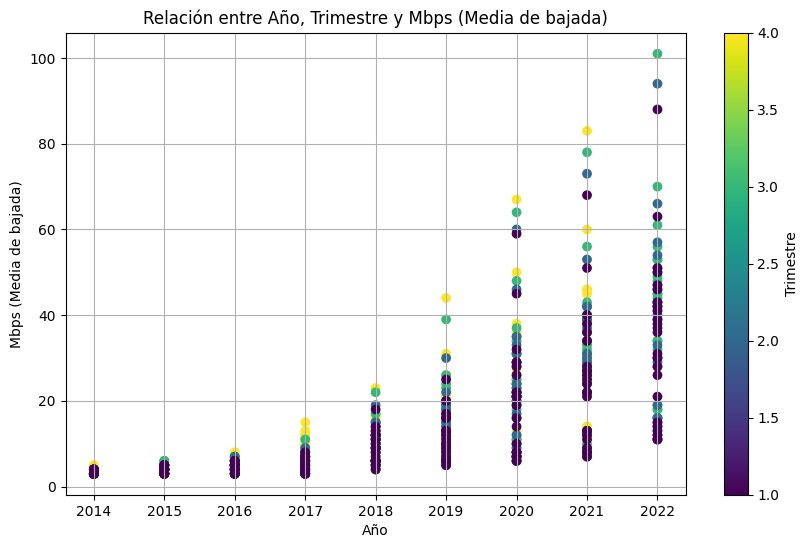

In [201]:

plt.figure(figsize=(10, 6))  # Tamaño del gráfico (opcional)
plt.scatter(historico_velocidad_internet['Año'], historico_velocidad_internet['Mbps (Media de bajada)'],
            c=historico_velocidad_internet['Trimestre'], cmap='viridis')
plt.colorbar(label='Trimestre')
plt.xlabel('Año')
plt.ylabel('Mbps (Media de bajada)')
plt.title('Relación entre Año, Trimestre y Mbps (Media de bajada)')
plt.grid(True)  # Mostrar cuadrícula (opcional)
plt.show()


Variación por trimestre: El uso del color en el gráfico (a través de la barra de color) permite distinguir los diferentes trimestres. Esto puede revelar si hay alguna estacionalidad o patrón específico en la velocidad de bajada en diferentes períodos del año.

Relación entre año y velocidad: Observar la dispersión de los puntos en el gráfico puede proporcionar información sobre la relación entre el año y la velocidad de bajada. Si los puntos están dispersos y no muestran una clara agrupación o patrón, podría indicar que la velocidad de bajada no está fuertemente correlacionada con el año.

Outliers: Los puntos atípicos o outliers que se encuentren fuera del patrón general. Estos puntos pueden indicar casos excepcionales o problemas en los datos que requieren una mayor exploración.

# continuamos con el siguiente dataset historico_velocidad_internet.csv

In [221]:
#cargamos nuestro datos
data_historico_velocidad_internet = pd.read_csv('..\data\historico_velocidad_internet.csv')
data_historico_velocidad_internet.head()

,Año,Trimestre,Mbps (Media de bajada),Trimestre.1
0,2022,3,"62,46",Jul-Sept 2022
1,2022,2,"58,44",Abr-Jun 2022
2,2022,1,"55,11",Ene-Mar 2022
3,2021,4,"52,34",Oct-Dic 2021
4,2021,3,"48,46",Jul-Sept 2021


In [222]:
#verificamos el número de filas y columnas en el conjunto de datos 
print("Número de filas y columnas:", data_historico_velocidad_internet.shape)

Número de filas y columnas: (35, 4)


In [223]:
#verificamos las columnas
print("Nombres de columnas:", data_historico_velocidad_internet.columns)

Nombres de columnas: Index(['Año', 'Trimestre', 'Mbps (Media de bajada)', 'Trimestre.1'], dtype='object')


In [224]:
#examinamos los tipos de datos de cada columna
print("Tipos de datos de las columnas:\n", data_historico_velocidad_internet.dtypes)

Tipos de datos de las columnas:
 Año                        int64
Trimestre                  int64
Mbps (Media de bajada)    object
Trimestre.1               object
dtype: object


In [385]:
#verificamos las estadisticas de las columnas
data_historico_velocidad_internet.describe()

,Año,Trimestre,Mbps (Media de bajada)
count,35.000000,35.000000,35.000000
mean,2017.885714,2.457143,21.827143
std,2.564135,1.120474,19.230717
min,2014.000000,1.000000,3.620000
25%,2016.000000,1.500000,5.250000
50%,2018.000000,2.000000,13.850000
75%,2020.000000,3.000000,39.495000
max,2022.000000,4.000000,62.460000


Estos análisis proporcionan información sobre la velocidad de bajada promedio, su variabilidad y la distribución de las velocidades en el conjunto de datos. También se identifica una tendencia de mejora en las velocidades de bajada a lo largo del tiempo.

In [226]:
#guardamos nuestro dato
data_historico_velocidad_internet.to_csv('..\data_clean\historico_velocidad_internet(2).csv')

# vamos a realizar un gráfico líneal temporal

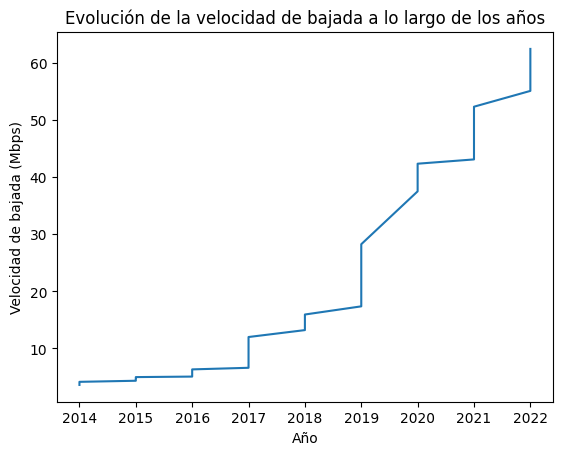

In [386]:
# Crear el gráfico de líneas
plt.plot(data_historico_velocidad_internet['Año'], data_historico_velocidad_internet['Mbps (Media de bajada)'])

# Personalizar el gráfico
plt.xlabel('Año')
plt.ylabel('Velocidad de bajada (Mbps)')
plt.title('Evolución de la velocidad de bajada a lo largo de los años')

# Mostrar el gráfico
plt.show()


Tendencia general: Si la línea de la velocidad de bajada muestra una tendencia creciente, indica que la velocidad promedio ha aumentado a lo largo de los años. Por el contrario, si la línea muestra una tendencia descendente, significa que la velocidad promedio ha disminuido.
En este caso se observa la tendencia es ascendente

Cambios puntuales: Se pueden identificar cambios puntuales en la velocidad de bajada en años específicos. Estos cambios pueden deberse a mejoras en la infraestructura de red, implementación de tecnologías más avanzadas o cambios en las políticas relacionadas con el acceso a Internet.

Variaciones estacionales: Dependiendo de la periodicidad de los datos (anual, trimestral, mensual, etc.), es posible observar patrones estacionales en la velocidad de bajada. Por ejemplo, si hay una tendencia a la disminución de la velocidad durante ciertos períodos del año, puede indicar una mayor demanda o congestión en esos momentos.

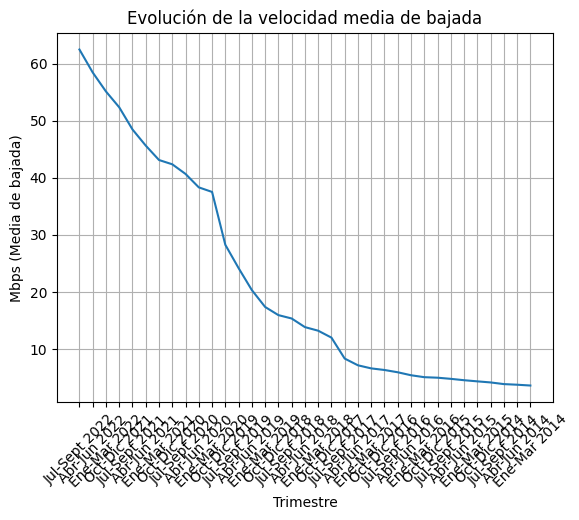

In [225]:
# Convertir la columna "Mbps (Media de bajada)" al tipo de dato numérico
data_historico_velocidad_internet['Mbps (Media de bajada)'] = data_historico_velocidad_internet['Mbps (Media de bajada)'].str.replace(',', '.').astype(float)

# Crear el gráfico de línea temporal
plt.plot(data_historico_velocidad_internet['Trimestre.1'], data_historico_velocidad_internet['Mbps (Media de bajada)'])
plt.xlabel('Trimestre')
plt.ylabel('Mbps (Media de bajada)')
plt.title('Evolución de la velocidad media de bajada')
plt.xticks(rotation=45)
plt.grid(True)

# Mostrar el gráfico
plt.show()


entre el dataframe  data_historico_velocidad_internet y historico_velocidad_internet
se observa que hay similitud en los datos en terminos de velocidad de bajada, que lo largo de los años hay incremente de crecimiento


# Continuamos con el siguiente dataset Internet_Accesos-por-tecnologia (1).csv

In [227]:
#cargamos nuestro archivo
internet_Accesos_por_tecnologia = pd.read_csv('..\data\Internet_Accesos-por-tecnologia (1).csv')
internet_Accesos_por_tecnologia.head()

,Año,Trimestre,Provincia,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total
0,2022,3,Buenos Aires,339.648,2.748.325,1.436.433,126.846,70.416,4.721.668
1,2022,3,Capital Federal,140.791,1.240.125,129.218,5.758,31.787,1.547.679
2,2022,3,Catamarca,10.010,10.495,46.224,1.329,2.235,70.293
3,2022,3,Chaco,27.164,61.800,44.645,8.178,2.359,144.146
4,2022,3,Chubut,45.377,72.212,9.574,29.784,8.831,165.778


In [228]:
#verificamos el número de filas y columnas en el conjunto de datos 
print("Número de filas y columnas:", internet_Accesos_por_tecnologia.shape)

Número de filas y columnas: (841, 9)


In [229]:
#verificamos las columnas
print("Nombres de columnas:", internet_Accesos_por_tecnologia.columns)

Nombres de columnas: Index(['Año', 'Trimestre', 'Provincia', 'ADSL', 'Cablemodem', 'Fibra óptica',
       'Wireless', 'Otros', 'Total'],
      dtype='object')


In [230]:
#examinamos los tipos de datos de cada columna
print("Tipos de datos de las columnas:\n", internet_Accesos_por_tecnologia.dtypes)

Tipos de datos de las columnas:
 Año              object
Trimestre        object
Provincia        object
ADSL             object
Cablemodem       object
Fibra óptica     object
Wireless        float64
Otros           float64
Total            object
dtype: object


In [233]:
# Lidiar con los valores faltantes
print("Valores faltantes por columna:\n", internet_Accesos_por_tecnologia.isnull().sum())

Valores faltantes por columna:
 Año             0
Trimestre       0
Provincia       0
ADSL            0
Cablemodem      0
Fibra óptica    0
Wireless        0
Otros           0
Total           0
dtype: int64


In [232]:
#eliminamos esos valores nulos
internet_Accesos_por_tecnologia = internet_Accesos_por_tecnologia.dropna()


In [387]:
#verificamos la descripción estádistica
internet_Accesos_por_tecnologia.describe()

,ADSL,Cablemodem,Fibra óptica,Wireless,Otros
count,8.400000e+02,8.400000e+02,8.400000e+02,840.000000,840.000000
mean,1.275668e+05,1.717750e+05,2.991186e+04,58.240476,102.010714
std,2.550543e+05,4.221661e+05,1.235013e+05,158.107730,207.248306
min,6.842000e+03,0.000000e+00,0.000000e+00,0.000000,1.000000
25%,2.247925e+04,8.599750e+03,1.860000e+02,3.000000,2.000000
50%,4.859600e+04,3.498400e+04,1.093000e+03,8.000000,15.000000
75%,1.045695e+05,7.074850e+04,1.386250e+04,26.000000,47.000000
max,1.586343e+06,2.748325e+06,1.436433e+06,952.000000,987.000000


estos datos proporcionan una idea de la distribución y la variabilidad de las diferentes tecnologías de conexión en el conjunto de datos. También indican la predominancia de ADSL y Cablemodem como las tecnologías más utilizadas.

In [241]:
#guardamos nuestro dato
internet_Accesos_por_tecnologia.to_csv('..\data_clean\internet_Accesos_por_tecnologia(1).csv')

# Vamos a realizar un grafico de línesas para comparar el acceso de internet su evlocución a traves de los años

In [ ]:
#convertimo nuestras columnas seleccionadas a tipos numéricos y tambien anticipar el error de puntos de separación de miles antes de realizar la conversión a float
internet_Accesos_por_tecnologia['ADSL'] = internet_Accesos_por_tecnologia['ADSL'].str.replace('.', '').astype(float)
internet_Accesos_por_tecnologia['Cablemodem'] = internet_Accesos_por_tecnologia['Cablemodem'].str.replace('.', '').astype(float)
internet_Accesos_por_tecnologia['Fibra óptica'] = internet_Accesos_por_tecnologia['Fibra óptica'].str.replace('.', '').astype(float)
internet_Accesos_por_tecnologia['Wireless'] = internet_Accesos_por_tecnologia['Wireless'].astype(float)
internet_Accesos_por_tecnologia['Otros'] = internet_Accesos_por_tecnologia['Otros'].astype(float)


C:\Users\Ricky Quinteros\AppData\Local\Temp\ipykernel_8892\792844382.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  accesos_por_trimestre = internet_Accesos_por_tecnologia.groupby(['Año', 'Trimestre']).sum()


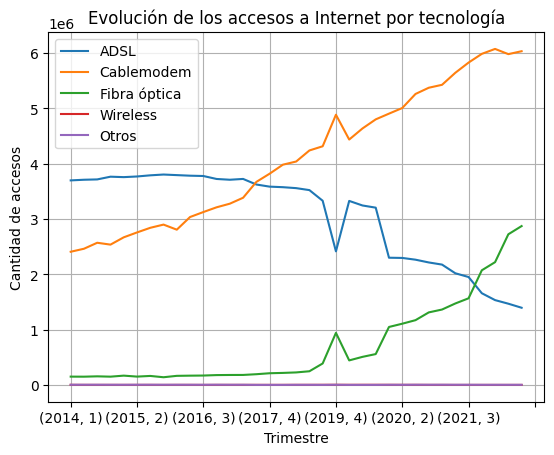

In [239]:
# Agrupar por año y trimestre y calcular la suma de accesos para cada tecnología
accesos_por_trimestre = internet_Accesos_por_tecnologia.groupby(['Año', 'Trimestre']).sum()

# Crear el gráfico de líneas
accesos_por_trimestre.plot(kind='line', y=['ADSL', 'Cablemodem', 'Fibra óptica', 'Wireless', 'Otros'])

# Personalizar el gráfico
plt.xlabel('Trimestre')
plt.ylabel('Cantidad de accesos')
plt.title('Evolución de los accesos a Internet por tecnología')
plt.legend(['ADSL', 'Cablemodem', 'Fibra óptica', 'Wireless', 'Otros'])
plt.grid(True)

# Mostrar el gráfico
plt.show()


Al observar el gráfico, se pueden identificar las tendencias y cambios en la cantidad de accesos a Internet para cada tecnología a lo largo del tiempo. Se puede analizar si alguna tecnología ha experimentado un crecimiento constante, si hay variaciones estacionales en los accesos, o si alguna tecnología ha ganado o perdido popularidad en comparación con otras.
En este caso predomina el acceso por CABLEMODEM y se nota como ASDL decrece

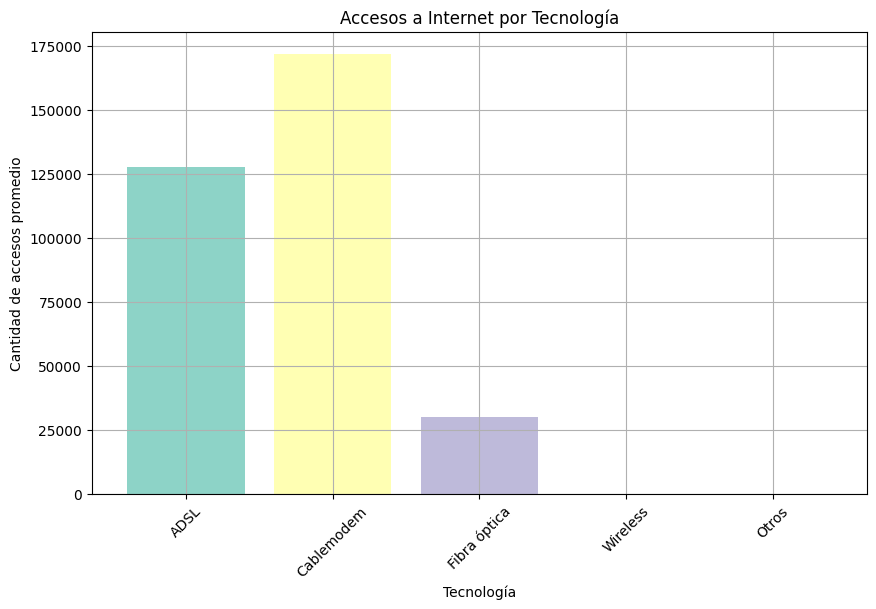

In [392]:

# Seleccionar las columnas relevantes para el gráfico de barras
columnas_tecnologia = ['ADSL', 'Cablemodem', 'Fibra óptica', 'Wireless', 'Otros']

# Obtener los valores de los accesos para cada tecnología
valores_accesos = internet_Accesos_por_tecnologia[columnas_tecnologia].mean().values

# Configurar los colores de las barras
colores = plt.cm.Set3(range(len(columnas_tecnologia)))

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(columnas_tecnologia, valores_accesos, color=colores)

# Personalizar el gráfico
plt.xlabel('Tecnología')
plt.ylabel('Cantidad de accesos promedio')
plt.title('Accesos a Internet por Tecnología')
plt.xticks(rotation=45)
plt.grid(True)

# Mostrar el gráfico
plt.show()


''Estas conclusiones nos brindan información sobre la distribución de las conexiones de internet en los diferentes tipos, así como la variabilidad y promedio de velocidad de cada tipo de conexión.
Los tipos de conexión Wireless y Otros muestran una mayor variabilidad en la cantidad de conexiones, como se evidencia en la desviación estándar relativamente alta.
El tipo de conexión con la mayor cantidad de conexiones en promedio es Cablemodem, seguido de ADSL y Fibra óptica.


# Continuamos con el siguiente dataset Internet_Accesos-por-tecnologia.csv

In [242]:
#cargamos nuestros datos
data_Internet_Accesos_por_tecnologia = pd.read_csv('..\data\Internet_Accesos-por-tecnologia.csv')
data_Internet_Accesos_por_tecnologia.head()

,Año,Trimestre,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total,Periodo
0,2022,3,1.395.277,6.031.970,2.871.541,557.110,235.230,11.091.128,Jul-Sept 2022
1,2022,2,1.468.333,5.979.214,2.723.285,556.243,231.609,10.958.684,Abr-Jun 2022
2,2022,1,1.533.240,6.073.426,2.219.533,545.814,251.996,10.624.009,Ene-Mar 2022
3,2021,4,1.657.615,5.984.240,2.072.236,523.107,252.596,10.489.794,Oct-Dic 2021
4,2021,3,1.950.631,5.826.257,1.566.048,492.415,250.190,10.085.541,Jul-Sept 2021


In [243]:
#verificamos el número de filas y columnas en el conjunto de datos 
print("Número de filas y columnas:", data_Internet_Accesos_por_tecnologia.shape)

Número de filas y columnas: (35, 9)


In [244]:
#verificamos las columnas
print("Nombres de columnas:", data_Internet_Accesos_por_tecnologia.columns)

Nombres de columnas: Index(['Año', 'Trimestre', 'ADSL', 'Cablemodem', 'Fibra óptica', 'Wireless',
       'Otros', 'Total', 'Periodo'],
      dtype='object')


In [245]:
#examinamos los tipos de datos de cada columna
print("Tipos de datos de las columnas:\n", data_Internet_Accesos_por_tecnologia.dtypes)

Tipos de datos de las columnas:
 Año               int64
Trimestre         int64
ADSL             object
Cablemodem       object
Fibra óptica     object
Wireless        float64
Otros           float64
Total            object
Periodo          object
dtype: object


In [246]:
# Lidiar con los valores faltantes
print("Valores faltantes por columna:\n", data_Internet_Accesos_por_tecnologia.isnull().sum())

Valores faltantes por columna:
 Año             0
Trimestre       0
ADSL            0
Cablemodem      0
Fibra óptica    0
Wireless        0
Otros           0
Total           0
Periodo         0
dtype: int64


In [393]:
data_Internet_Accesos_por_tecnologia.describe()

,Año,Trimestre,ADSL,Cablemodem,Fibra óptica,Wireless,Otros
count,35.000000,35.000000,3.500000e+01,3.500000e+01,3.500000e+01,35.000000,35.000000
mean,2017.885714,2.457143,3.040425e+06,4.122601e+06,7.390627e+05,248.280029,147.431086
std,2.564135,1.120474,8.354122e+05,1.225277e+06,7.861772e+05,174.354293,85.868717
min,2014.000000,1.000000,1.395277e+06,2.407330e+06,1.391870e+05,70.749000,54.300000
25%,2016.000000,1.500000,2.279711e+06,2.966749e+06,1.679880e+05,85.107500,62.763500
50%,2018.000000,2.000000,3.557216e+06,4.038141e+06,2.262850e+05,194.267000,100.554000
75%,2020.000000,3.000000,3.723156e+06,5.132233e+06,1.138802e+06,394.963000,247.918500
max,2022.000000,4.000000,3.803024e+06,6.073426e+06,2.871541e+06,557.110000,265.328000


 permiten entender mejor la distribución y características de los accesos a Internet por tipo de tecnología, lo cual puede ser útil para tomar decisiones relacionadas con la infraestructura y la oferta de servicios de Internet. Siguen predominando CABLEMODEM y ADSL

In [251]:
#guardamos nuestro datos
data_Internet_Accesos_por_tecnologia.to_csv('..\data_clean\Internet_Accesos_por_tecnologia(2).csv')

# vamos a realizar un gráfico de líneas pára ver datos continuos de las diferentes tecnologías de internet

In [248]:
data_Internet_Accesos_por_tecnologia['ADSL'] = data_Internet_Accesos_por_tecnologia['ADSL'].str.replace('.', '').astype(float)
data_Internet_Accesos_por_tecnologia['Cablemodem'] = data_Internet_Accesos_por_tecnologia['Cablemodem'].str.replace('.', '').astype(float)
data_Internet_Accesos_por_tecnologia['Fibra óptica'] = data_Internet_Accesos_por_tecnologia['Fibra óptica'].str.replace('.', '').astype(float)
data_Internet_Accesos_por_tecnologia['Wireless'] = data_Internet_Accesos_por_tecnologia['Wireless'].astype(float)
data_Internet_Accesos_por_tecnologia['Otros'] = data_Internet_Accesos_por_tecnologia['Otros'].astype(float)


C:\Users\Ricky Quinteros\AppData\Local\Temp\ipykernel_8892\4104987263.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data_Internet_Accesos_por_tecnologia['ADSL'] = data_Internet_Accesos_por_tecnologia['ADSL'].str.replace('.', '').astype(float)
C:\Users\Ricky Quinteros\AppData\Local\Temp\ipykernel_8892\4104987263.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data_Internet_Accesos_por_tecnologia['Cablemodem'] = data_Internet_Accesos_por_tecnologia['Cablemodem'].str.replace('.', '').astype(float)
C:\Users\Ricky Quinteros\AppData\Local\Temp\ipykernel_8892\4104987263.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In a

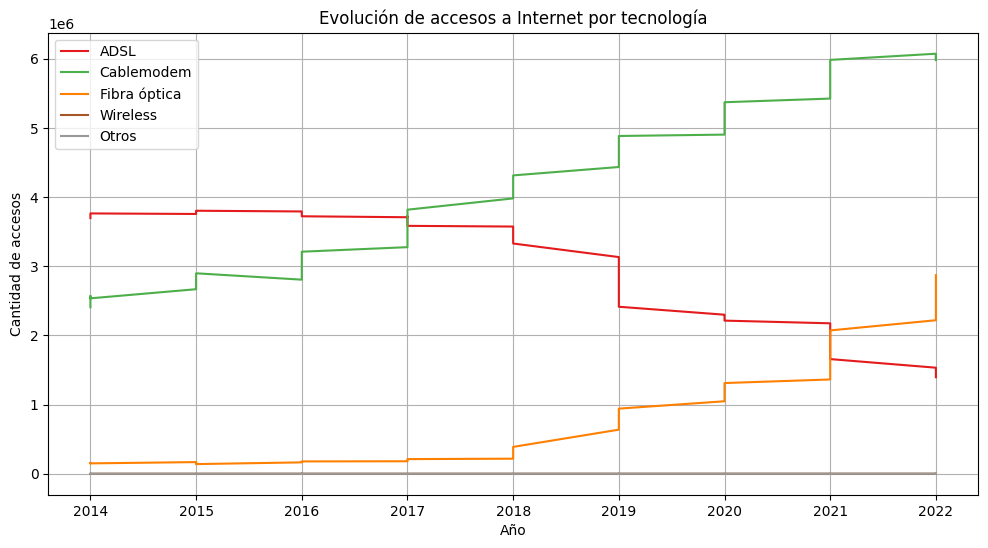

In [394]:
#gráfico de líneas
plt.figure(figsize=(12, 6))

tecnologias = ['ADSL', 'Cablemodem', 'Fibra óptica', 'Wireless', 'Otros']
colores = plt.cm.Set1(np.linspace(0, 1, len(tecnologias)))

for tecnologia, color in zip(tecnologias, colores):
    plt.plot(data_Internet_Accesos_por_tecnologia['Año'], data_Internet_Accesos_por_tecnologia[tecnologia], color=color, label=tecnologia)

plt.xlabel('Año')
plt.ylabel('Cantidad de accesos')
plt.title('Evolución de accesos a Internet por tecnología')
plt.legend(loc='upper left')
plt.grid(True)

plt.show()


Cambios en la popularidad de las tecnologías: Al comparar las líneas de diferentes tecnologías, podemos observar cómo ha variado su popularidad a lo largo del tiempo. Por ejemplo, CABLEMODEM iba creciendo a lo largo de tiempo y ADSL cayendo y sumando en crecimiento la tecnología de Fibra Óptica.

Momentos de inflexión: Podemos identificar puntos en el tiempo donde ha ocurrido un cambio significativo en la cantidad de accesos a una tecnología en particular. Estos puntos de inflexión pueden ser indicativos de eventos o avances tecnológicos que han impactado la adopción de esa tecnología.

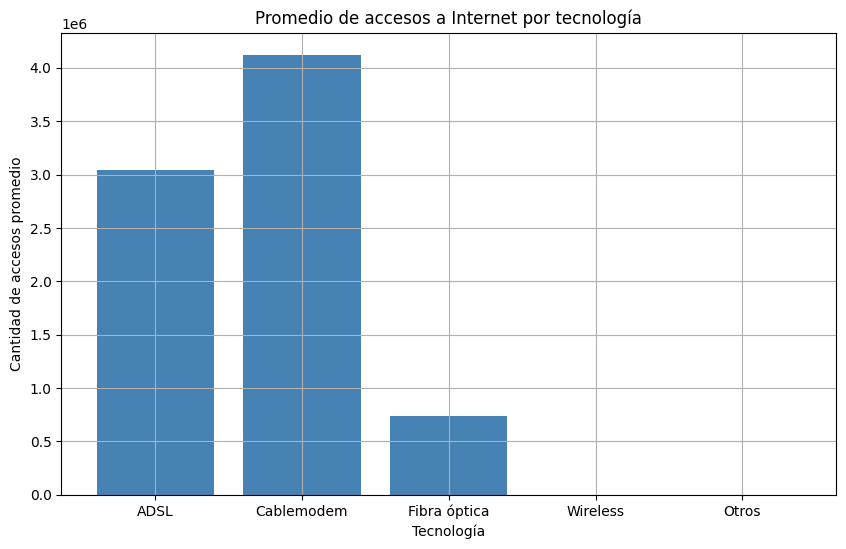

In [395]:
#Gráfico de barras
tecnologias = ['ADSL', 'Cablemodem', 'Fibra óptica', 'Wireless', 'Otros']
valores = data_Internet_Accesos_por_tecnologia.loc[:, tecnologias].mean()

plt.figure(figsize=(10, 6))
plt.bar(tecnologias, valores, color='steelblue')

plt.xlabel('Tecnología')
plt.ylabel('Cantidad de accesos promedio')
plt.title('Promedio de accesos a Internet por tecnología')
plt.grid(True)

plt.show()


'En conclusión los dataframe data_Internet_Accesos_por_tecnologia y Internet_Accesos_por_tecnologia contienen similitud en sus datos dando una claridad que la tecnología mas usada es el camble modem'

# continuamos con el siguiente dataframe Internet_Accesos-por-velocidad (1).csv

In [253]:
#cargamos nuestro archivo
internet_Accesos_por_velocidad = pd.read_csv('..\data\Internet_Accesos-por-velocidad (1).csv')
internet_Accesos_por_velocidad.head()

,Año,Trimestre,Provincia,HASTA 512 kbps,+ 512 Kbps - 1 Mbps,+ 1 Mbps - 6 Mbps,+ 6 Mbps - 10 Mbps,+ 10 Mbps - 20 Mbps,+ 20 Mbps - 30 Mbps,+ 30 Mbps,OTROS,Total
0,2022,3,Buenos Aires,29.985,27.709,290.315,297.915,267.044,124.190,3.618.689,65.821,4.721.668
1,2022,3,Capital Federal,517.000,5.742,34.371,67.829,51.946,28.692,1.253.105,105.477,1.547.679
2,2022,3,Catamarca,71.000,384.000,3.107,5.389,5.099,3.737,50.298,2.208,70.293
3,2022,3,Chaco,461.000,987.000,16.782,18.938,8.049,15.828,79.390,3.711,144.146
4,2022,3,Chubut,109.000,1.444,45.707,30.940,34.682,15.309,17.563,20.024,165.778


In [254]:
#verificamos el número de filas y columnas en el conjunto de datos 
print("Número de filas y columnas:", internet_Accesos_por_velocidad.shape)

Número de filas y columnas: (840, 12)


In [255]:
#verificamos las columnas
print("Nombres de columnas:", internet_Accesos_por_velocidad.columns)

Nombres de columnas: Index(['Año', 'Trimestre', 'Provincia', 'HASTA 512 kbps',
       '+ 512 Kbps - 1 Mbps', '+ 1 Mbps - 6 Mbps', '+ 6 Mbps - 10 Mbps',
       '+ 10 Mbps - 20 Mbps', '+ 20 Mbps - 30 Mbps', '+ 30 Mbps', 'OTROS',
       'Total'],
      dtype='object')


In [256]:
#examinamos los tipos de datos de cada columna
print("Tipos de datos de las columnas:\n", internet_Accesos_por_velocidad.dtypes)

Tipos de datos de las columnas:
 Año                      int64
Trimestre                int64
Provincia               object
HASTA 512 kbps         float64
+ 512 Kbps - 1 Mbps    float64
+ 1 Mbps - 6 Mbps       object
+ 6 Mbps - 10 Mbps     float64
+ 10 Mbps - 20 Mbps    float64
+ 20 Mbps - 30 Mbps    float64
+ 30 Mbps               object
OTROS                  float64
Total                   object
dtype: object


In [257]:
# Lidiar con los valores faltantes
print("Valores faltantes por columna:\n", internet_Accesos_por_velocidad.isnull().sum())

Valores faltantes por columna:
 Año                    0
Trimestre              0
Provincia              0
HASTA 512 kbps         0
+ 512 Kbps - 1 Mbps    0
+ 1 Mbps - 6 Mbps      0
+ 6 Mbps - 10 Mbps     0
+ 10 Mbps - 20 Mbps    0
+ 20 Mbps - 30 Mbps    0
+ 30 Mbps              0
OTROS                  6
Total                  0
dtype: int64


In [396]:
internet_Accesos_por_velocidad.describe()

,Año,Trimestre,HASTA 512 kbps,+ 512 Kbps - 1 Mbps,+ 1 Mbps - 6 Mbps,+ 6 Mbps - 10 Mbps,+ 10 Mbps - 20 Mbps,+ 20 Mbps - 30 Mbps,+ 30 Mbps,OTROS
count,840.000000,840.000000,840.000000,840.000000,8.400000e+02,840.000000,840.000000,840.000000,8.400000e+02,834.000000
mean,2017.885714,2.457143,126.009998,101.790393,1.509700e+05,71.417265,79.988627,100.758158,7.917956e+04,32.937064
std,2.528745,1.105009,187.578607,207.396126,3.481538e+05,140.324223,170.586599,208.683467,3.426234e+05,128.937905
min,2014.000000,1.000000,1.007000,0.000000,2.842000e+03,0.000000,0.000000,0.000000,0.000000e+00,-1.945000
25%,2016.000000,1.000000,10.000000,3.362500,2.853925e+04,5.357250,4.872000,2.019000,7.000000e+00,0.000000
50%,2018.000000,2.000000,50.000000,8.788000,4.883450e+04,20.157000,14.965500,11.251500,8.825000e+02,0.000000
75%,2020.000000,3.000000,134.000000,84.340500,8.689750e+04,62.225500,55.093000,64.286250,1.966075e+04,7.497750
max,2022.000000,4.000000,998.000000,999.000000,2.299705e+06,917.000000,978.000000,997.000000,3.618689e+06,923.000000


Se observa que  las velocidades en los rangos "+ 1 Mbps - 6 Mbps" y "+ 6 Mbps - 10 Mbps" parecen ser las más consumidas, ya que tienen valores promedio más altos y una mayor concentración de conexiones en velocidades más altas según los cuartiles.

In [268]:
#guardamos nuestro dato
internet_Accesos_por_velocidad.to_csv('..\data_clean\internet_Accesos_por_velocidad(1).csv')

# Gráficamos, realizamos un grafico circular , para ver el porcentaje de la velocidad de internet más consumido

In [261]:
# convertimos nuestros datos a valor numérico 
internet_Accesos_por_velocidad['HASTA 512 kbps'] = internet_Accesos_por_velocidad['HASTA 512 kbps'].apply(lambda x: float(x.replace('.', '')) if isinstance(x, str) else x)
internet_Accesos_por_velocidad['+ 512 Kbps - 1 Mbps'] = internet_Accesos_por_velocidad['+ 512 Kbps - 1 Mbps'].apply(lambda x: float(x.replace('.', '')) if isinstance(x, str) else x)
internet_Accesos_por_velocidad['+ 1 Mbps - 6 Mbps'] = internet_Accesos_por_velocidad['+ 1 Mbps - 6 Mbps'].apply(lambda x: float(x.replace('.', '')) if isinstance(x, str) else x)
internet_Accesos_por_velocidad['+ 6 Mbps - 10 Mbps'] = internet_Accesos_por_velocidad['+ 6 Mbps - 10 Mbps'].apply(lambda x: float(x.replace('.', '')) if isinstance(x, str) else x)
internet_Accesos_por_velocidad['+ 10 Mbps - 20 Mbps'] = internet_Accesos_por_velocidad['+ 10 Mbps - 20 Mbps'].apply(lambda x: float(x.replace('.', '')) if isinstance(x, str) else x)
internet_Accesos_por_velocidad['+ 20 Mbps - 30 Mbps'] = internet_Accesos_por_velocidad['+ 20 Mbps - 30 Mbps'].apply(lambda x: float(x.replace('.', '')) if isinstance(x, str) else x)
internet_Accesos_por_velocidad['+ 30 Mbps'] = internet_Accesos_por_velocidad['+ 30 Mbps'].apply(lambda x: float(x.replace('.', '')) if isinstance(x, str) else x)
internet_Accesos_por_velocidad['OTROS'] = internet_Accesos_por_velocidad['OTROS'].apply(lambda x: float(x.replace('.', '')) if isinstance(x, str) else x)


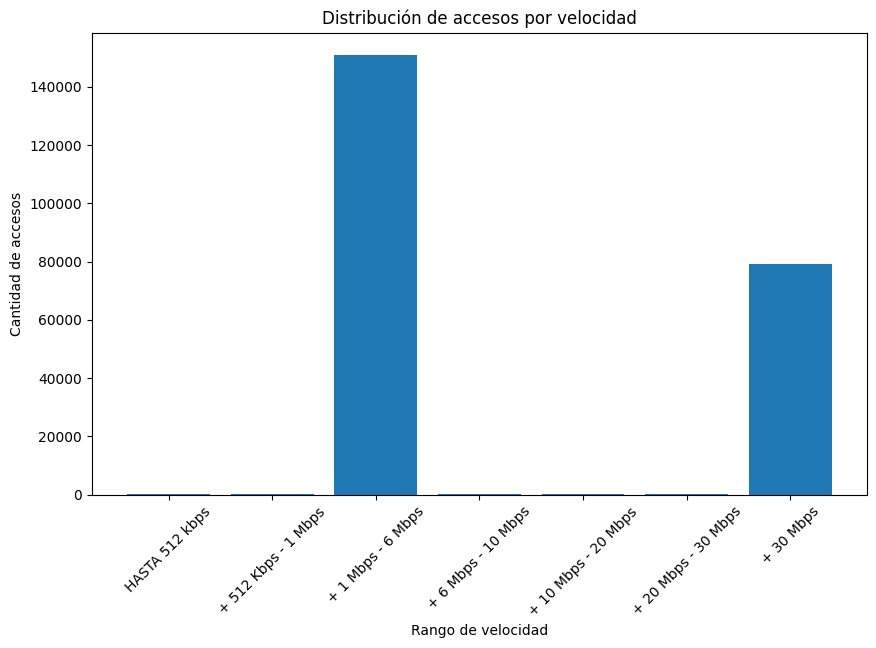

In [397]:
# Seleccionar las columnas relevantes para el gráfico
columnas_velocidad = ['HASTA 512 kbps', '+ 512 Kbps - 1 Mbps', '+ 1 Mbps - 6 Mbps', '+ 6 Mbps - 10 Mbps', '+ 10 Mbps - 20 Mbps', '+ 20 Mbps - 30 Mbps', '+ 30 Mbps']

# Obtener los valores de los accesos por velocidad
valores_velocidad = internet_Accesos_por_velocidad[columnas_velocidad].mean().values

# Configurar los nombres de las categorías de velocidad
categorias_velocidad = columnas_velocidad

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(categorias_velocidad, valores_velocidad)

# Personalizar el gráfico
plt.xlabel('Rango de velocidad')
plt.ylabel('Cantidad de accesos')
plt.title('Distribución de accesos por velocidad')
plt.xticks(rotation=45)

# Mostrar el gráfico
plt.show()


Este gráfico nos  permite tener una visión general de cómo se distribuyen los accesos a Internet por velocidad y ofrece información sobre las preferencias y tendencias de los usuarios en cuanto a la velocidad de conexión. En nuestro gráfico se observa que los usuarios consumen en el rango de velocidad ente 1 Mbps y 6 Mbps

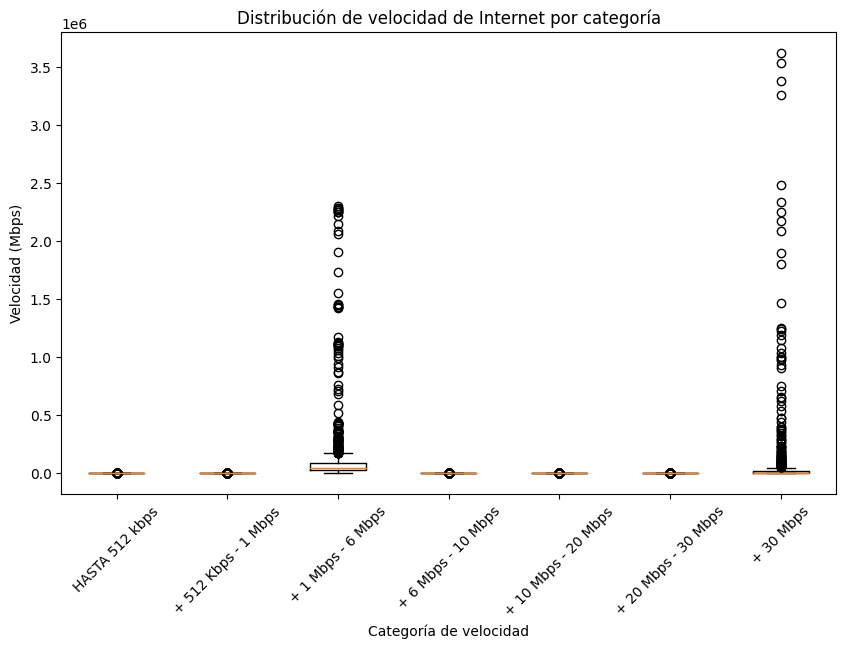

In [398]:
# Seleccionar las columnas relevantes para el gráfico
columnas_velocidad = ['HASTA 512 kbps', '+ 512 Kbps - 1 Mbps', '+ 1 Mbps - 6 Mbps', '+ 6 Mbps - 10 Mbps', '+ 10 Mbps - 20 Mbps', '+ 20 Mbps - 30 Mbps', '+ 30 Mbps']

# Obtener los datos de velocidad
datos_velocidad = internet_Accesos_por_velocidad[columnas_velocidad].values

# Crear el gráfico de cajas
plt.figure(figsize=(10, 6))
plt.boxplot(datos_velocidad)

# Personalizar el gráfico
plt.xlabel('Categoría de velocidad')
plt.ylabel('Velocidad (Mbps)')
plt.title('Distribución de velocidad de Internet por categoría')
plt.xticks(range(1, len(columnas_velocidad) + 1), columnas_velocidad, rotation=45)

# Mostrar el gráfico
plt.show()


Valores atípicos: Los puntos individuales que se encuentran por encima o por debajo de las cajas representan los valores atípicos o extremos. Estos valores pueden indicar velocidades inusuales o inesperadas que se alejan de la mayoría de las velocidades en esa categoría. según nuestro grafico hay muchas diferencias enntre las diferentes velocidades de intenet.

Comparación entre categorías: Al observar las cajas en conjunto, se pueden comparar las distribuciones de velocidades entre las diferentes categorías. Como en el gráfico anterior rango de velocidad ente 1 Mbps y 6 Mbps hay mayores distribuciones

En conclusión: La distribución de accesos por velocidad, la mayoría de los accesos se encuentran en los rangos de velocidad más bajos, como "HASTA 512 kbps" y "+ 512 Kbps - 1 Mbps". A medida que aumenta la velocidad, la cantidad de accesos disminuye gradualmente.
y hay una cantidad considerable de valores atipicos, los valores vacíos fueron reemplazados por 0 ya que por falta de información no se hizo una imputación a esos datos


# Continuamos con el siguiente dataset  Internet_Accesos-por-velocidad.csv

In [270]:
data_Internet_Accesos_por_velocidad = pd.read_csv('..\data\Internet_Accesos-por-velocidad.csv')
data_Internet_Accesos_por_velocidad.head()

,Año,Trimestre,Hasta 512 kbps,Entre 512 Kbps y 1 Mbps,Entre 1 Mbps y 6 Mbps,Entre 6 Mbps y 10 Mbps,Entre 10 Mbps y 20 Mbps,Entre 20 Mbps y 30 Mbps,Más de 30 Mbps,OTROS,Total
0,2022,3,33.013,96.727,1.161.370,1.151.906,823.505,479.822,6.995.750,349.035,11.091.128
1,2022,2,33.667,99.498,1.193.090,1.197.030,856.562,485.321,6.741.922,351.594,10.958.684
2,2022,1,34.890,104.840,1.263.273,1.209.148,967.508,509.83,6.336.187,198.333,10.624.009
3,2021,4,41.262,28.521,1.413.208,1.245.333,976.539,558.358,6.032.322,194.251,10.489.794
4,2021,3,40.174,41.437,2.550.229,1.095.772,710.122,536.364,4.948.174,163.269,10.085.541


In [271]:
#verificamos el número de filas y columnas en el conjunto de datos 
print("Número de filas y columnas:", data_Internet_Accesos_por_velocidad.shape)

Número de filas y columnas: (35, 11)


In [272]:
#verificamos las columnas
print("Nombres de columnas:", data_Internet_Accesos_por_velocidad.columns)

Nombres de columnas: Index(['Año', 'Trimestre', 'Hasta 512 kbps', 'Entre 512 Kbps y 1 Mbps',
       'Entre 1 Mbps y 6 Mbps', 'Entre 6 Mbps y 10 Mbps',
       'Entre 10 Mbps y 20 Mbps', 'Entre 20 Mbps y 30 Mbps', 'Más de 30 Mbps',
       'OTROS', 'Total'],
      dtype='object')


In [274]:
#examinamos los tipos de datos de cada columna
print("Tipos de datos de las columnas:\n", data_Internet_Accesos_por_velocidad.dtypes)



Tipos de datos de las columnas:
 Año                          int64
Trimestre                    int64
Hasta 512 kbps             float64
Entre 512 Kbps y 1 Mbps    float64
Entre 1 Mbps y 6 Mbps       object
Entre 6 Mbps y 10 Mbps      object
Entre 10 Mbps y 20 Mbps     object
Entre 20 Mbps y 30 Mbps     object
Más de 30 Mbps              object
OTROS                      float64
Total                       object
dtype: object


In [273]:
# Lidiar con los valores faltantes
print("Valores faltantes por columna:\n", data_Internet_Accesos_por_velocidad.isnull().sum())

Valores faltantes por columna:
 Año                        0
Trimestre                  0
Hasta 512 kbps             0
Entre 512 Kbps y 1 Mbps    0
Entre 1 Mbps y 6 Mbps      0
Entre 6 Mbps y 10 Mbps     0
Entre 10 Mbps y 20 Mbps    0
Entre 20 Mbps y 30 Mbps    0
Más de 30 Mbps             0
OTROS                      0
Total                      0
dtype: int64


In [400]:
data_Internet_Accesos_por_velocidad.describe()

,Año,Trimestre,Hasta 512 kbps,Entre 512 Kbps y 1 Mbps,Entre 1 Mbps y 6 Mbps,Entre 6 Mbps y 10 Mbps,Entre 10 Mbps y 20 Mbps,Entre 20 Mbps y 30 Mbps,Más de 30 Mbps,OTROS
count,35.000000,35.000000,35.000000,35.000000,3.500000e+01,3.500000e+01,3.500000e+01,3.500000e+01,3.500000e+01,35.000000
mean,2017.885714,2.457143,50.074229,243.428314,3.623279e+06,8.475340e+05,8.585409e+05,4.290467e+05,1.889845e+06,118.396000
std,2.564135,1.120474,53.083966,199.321891,1.292407e+06,3.367870e+05,5.433041e+05,4.911153e+05,2.366170e+06,112.930694
min,2014.000000,1.000000,5.675000,28.521000,1.161370e+06,5.716200e+04,7.379300e+04,3.450000e+02,2.217000e+03,0.000000
25%,2016.000000,1.500000,26.397000,68.384500,2.643902e+06,7.799985e+05,4.860880e+05,3.150600e+04,1.578800e+04,0.000000
50%,2018.000000,2.000000,39.487000,217.997000,3.428759e+06,9.769560e+05,8.077750e+05,2.106680e+05,4.443910e+05,155.145000
75%,2020.000000,3.000000,41.210000,394.515500,4.996999e+06,1.057958e+06,1.149810e+06,5.951520e+05,3.882480e+06,196.292000
max,2022.000000,4.000000,241.713000,687.619000,5.153437e+06,1.245333e+06,2.068087e+06,1.688748e+06,6.995750e+06,351.594000


contienen la misma descripción estádistica que el datframe Internet_Accesos_por_velocidad

In [281]:
#guaradamos nuestro datos
data_Internet_Accesos_por_velocidad.to_csv('..\data_clean\Internet_Accesos_por_velocidad(2).csv')

# Realizamos un gráfico de líneas para ver la evolucions del acceso de internet por velocidad

In [278]:
# convertimos nuestros datos a valor numérico 
data_Internet_Accesos_por_velocidad['Hasta 512 kbps'] = data_Internet_Accesos_por_velocidad['Hasta 512 kbps'].apply(lambda x: float(x.replace('.', '')) if isinstance(x, str) else x)
data_Internet_Accesos_por_velocidad['Entre 512 Kbps y 1 Mbps'] = data_Internet_Accesos_por_velocidad['Entre 512 Kbps y 1 Mbps'].apply(lambda x: float(x.replace('.', '')) if isinstance(x, str) else x)
data_Internet_Accesos_por_velocidad['Entre 1 Mbps y 6 Mbps'] = data_Internet_Accesos_por_velocidad['Entre 1 Mbps y 6 Mbps'].apply(lambda x: float(x.replace('.', '')) if isinstance(x, str) else x)
data_Internet_Accesos_por_velocidad['Entre 6 Mbps y 10 Mbps'] = data_Internet_Accesos_por_velocidad['Entre 6 Mbps y 10 Mbps'].apply(lambda x: float(x.replace('.', '')) if isinstance(x, str) else x)
data_Internet_Accesos_por_velocidad['Entre 10 Mbps y 20 Mbps'] = data_Internet_Accesos_por_velocidad['Entre 10 Mbps y 20 Mbps'].apply(lambda x: float(x.replace('.', '')) if isinstance(x, str) else x)
data_Internet_Accesos_por_velocidad['Entre 20 Mbps y 30 Mbps'] = data_Internet_Accesos_por_velocidad['Entre 20 Mbps y 30 Mbps'].apply(lambda x: float(x.replace('.', '')) if isinstance(x, str) else x)
data_Internet_Accesos_por_velocidad['Más de 30 Mbps'] = data_Internet_Accesos_por_velocidad['Más de 30 Mbps'].apply(lambda x: float(x.replace('.', '')) if isinstance(x, str) else x)
data_Internet_Accesos_por_velocidad['OTROS'] = data_Internet_Accesos_por_velocidad['OTROS'].apply(lambda x: float(x.replace('.', '')) if isinstance(x, str) else x)


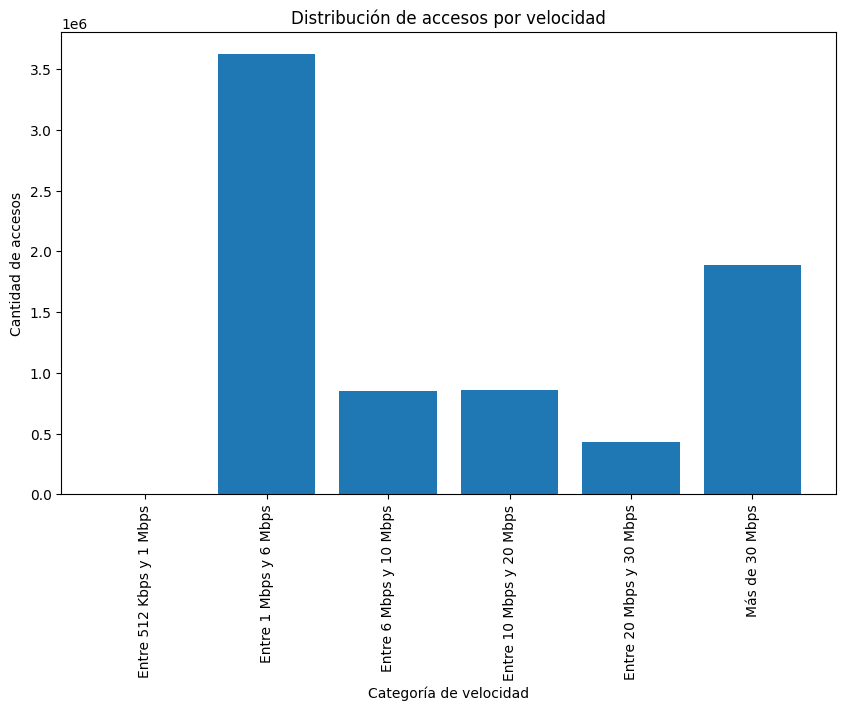

In [408]:
# Seleccionar las columnas relevantes para el gráfico
columnas_velocidad = ['Entre 512 Kbps y 1 Mbps', 'Entre 1 Mbps y 6 Mbps', 'Entre 6 Mbps y 10 Mbps', 'Entre 10 Mbps y 20 Mbps', 'Entre 20 Mbps y 30 Mbps', 'Más de 30 Mbps']

# Obtener los valores de las velocidades de acceso
valores_velocidad = data_Internet_Accesos_por_velocidad[columnas_velocidad].mean()

# Ajustar el tamaño de la figura
plt.figure(figsize=(10, 6))

# Crear el gráfico de barras
plt.bar(columnas_velocidad, valores_velocidad)

# Personalizar el gráfico
plt.xlabel('Categoría de velocidad')
plt.ylabel('Cantidad de accesos')
plt.title('Distribución de accesos por velocidad')
plt.xticks(rotation=90)  # Rotar los textos en el eje x

# Mostrar el gráfico
plt.show()


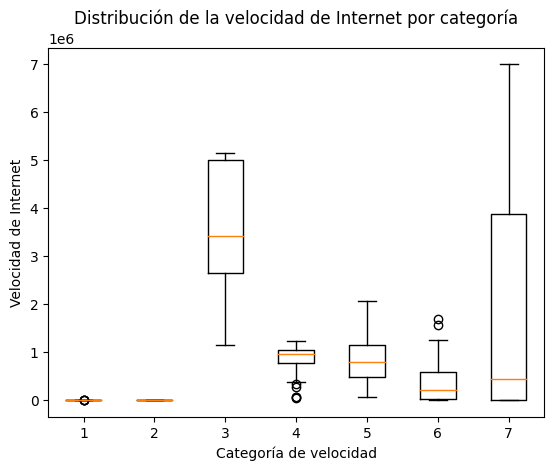

In [403]:
# Seleccionar las columnas relevantes para el gráfico de cajas
columnas_velocidad = ['Hasta 512 kbps', 'Entre 512 Kbps y 1 Mbps', 'Entre 1 Mbps y 6 Mbps', 'Entre 6 Mbps y 10 Mbps', 'Entre 10 Mbps y 20 Mbps', 'Entre 20 Mbps y 30 Mbps', 'Más de 30 Mbps']

# Crear el gráfico de cajas
plt.boxplot(data_Internet_Accesos_por_velocidad[columnas_velocidad])

# Personalizar el gráfico
plt.xlabel('Categoría de velocidad')
plt.ylabel('Velocidad de Internet')
plt.title('Distribución de la velocidad de Internet por categoría')

# Mostrar el gráfico
plt.show()


Con esto se tiene claro que entre el rango de velocidades 1 Mbps y 6 Mbps son los más usados por la población

C:\Users\Ricky Quinteros\AppData\Local\Temp\ipykernel_8892\1158217024.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  valores_trimestre = data_Internet_Accesos_por_velocidad.groupby('Trimestre').mean()


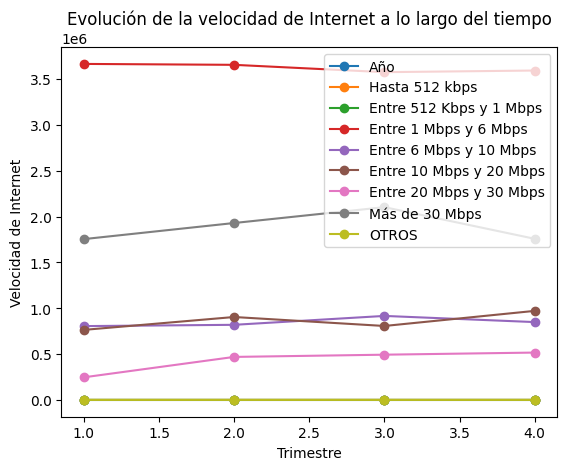

In [404]:
# Obtener los valores de la velocidad de Internet para cada trimestre
valores_trimestre = data_Internet_Accesos_por_velocidad.groupby('Trimestre').mean()

# Crear el gráfico de líneas
valores_trimestre.plot(marker='o')

# Personalizar el gráfico
plt.xlabel('Trimestre')
plt.ylabel('Velocidad de Internet')
plt.title('Evolución de la velocidad de Internet a lo largo del tiempo')

# Mostrar el gráfico
plt.show()


En conclusión: ambos dataframes data_Internet_Accesos_por_velocidad y Internet_Accesos_por_velocidad, la informacion de velocidad de internet entre 512 Mbps - 1 hasta 6 Mbps es más consumido, pero baja gradualmente mientras aumenta la velocidad del internet

# continuamos con el siguiente dataset Internet_BAF (1).csv

In [282]:
Internet_BAF = pd.read_csv('..\data\Internet_BAF (1).csv')
Internet_BAF.head()

,Año,Trimestre,Provincia,Banda ancha fija,Dial up,Total
0,2022,3,Buenos Aires,4.715.469,6.199,4.721.668
1,2022,3,Capital Federal,1.545.534,2.145,1.547.679
2,2022,3,Catamarca,70.292,1,70.293
3,2022,3,Chaco,144.141,5,144.146
4,2022,3,Chubut,164.874,904,165.778


In [283]:
#verificamos el número de filas y columnas en el conjunto de datos 
print("Número de filas y columnas:", Internet_BAF.shape)

Número de filas y columnas: (840, 6)


In [284]:
#verificamos las columnas
print("Nombres de columnas:", Internet_BAF.columns)

Nombres de columnas: Index(['Año', 'Trimestre', 'Provincia', 'Banda ancha fija', 'Dial up',
       'Total'],
      dtype='object')


In [285]:
#examinamos los tipos de datos de cada columna
print("Tipos de datos de las columnas:\n", Internet_BAF.dtypes)

Tipos de datos de las columnas:
 Año                  int64
Trimestre            int64
Provincia           object
Banda ancha fija    object
Dial up             object
Total               object
dtype: object


In [286]:
# Lidiar con los valores faltantes
print("Valores faltantes por columna:\n", Internet_BAF.isnull().sum())

Valores faltantes por columna:
 Año                 0
Trimestre           0
Provincia           0
Banda ancha fija    0
Dial up             2
Total               0
dtype: int64


In [409]:
Internet_BAF.describe()

,Año,Trimestre,Banda ancha fija,Dial up,Total
count,840.000000,840.000000,8.400000e+02,838.000000,8.400000e+02
mean,2017.885714,2.457143,3.447674e+07,9766.324582,3.457417e+05
std,2.528745,1.105009,7.400503e+07,24207.357371,7.419436e+05
min,2014.000000,1.000000,1.219300e+06,0.000000,1.255700e+04
25%,2016.000000,1.000000,5.192225e+06,90.000000,5.202975e+04
50%,2018.000000,2.000000,1.029360e+07,1480.000000,1.034895e+05
75%,2020.000000,3.000000,1.778685e+07,6190.000000,1.779148e+05
max,2022.000000,4.000000,4.715469e+08,152290.000000,4.721668e+06


Estos datos nos brindan una visión general de la distribución y tendencias de los accesos a la banda ancha fija y dial up a lo largo del tiempo, así como la variabilidad en la cantidad de accesos. También nos permite identificar los valores extremos y los rangos intercuartílicos que indican la dispersión de los datos.

In [303]:
#guardamos nuestros datos
Internet_BAF.to_csv('..\data_clean\Internet_BAF(1).csv')

# Realizamos un gráfico para analizar la relación entre las conexiones de banda ancha fija y dial-up 

In [299]:
#convertimos nuestros datos a numericos
Internet_BAF['Banda ancha fija'] = Internet_BAF['Banda ancha fija'].astype(str).replace('- 0', '0').str.replace('.', '').astype(float)
Internet_BAF['Dial up'] = Internet_BAF['Dial up'].astype(str).replace('- 0', '0').str.replace('.', '').astype(float)
Internet_BAF['Total'] = Internet_BAF['Total'].astype(str).replace('- 0', '0').str.replace('.', '').astype(float)


C:\Users\Ricky Quinteros\AppData\Local\Temp\ipykernel_8892\992342122.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  Internet_BAF['Banda ancha fija'] = Internet_BAF['Banda ancha fija'].astype(str).replace('- 0', '0').str.replace('.', '').astype(float)
C:\Users\Ricky Quinteros\AppData\Local\Temp\ipykernel_8892\992342122.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  Internet_BAF['Dial up'] = Internet_BAF['Dial up'].astype(str).replace('- 0', '0').str.replace('.', '').astype(float)
C:\Users\Ricky Quinteros\AppData\Local\Temp\ipykernel_8892\992342122.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single c

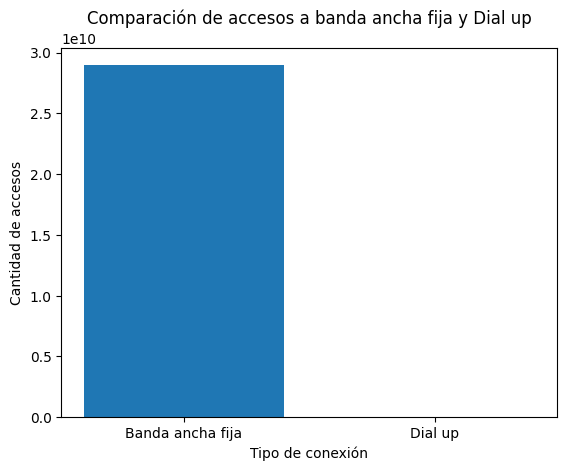

In [410]:

# Seleccionar los datos relevantes
tipos_conexion = ['Banda ancha fija', 'Dial up']
cantidad_accesos = [Internet_BAF['Banda ancha fija'].sum(), Internet_BAF['Dial up'].sum()]

# Crear el gráfico de barras
plt.bar(tipos_conexion, cantidad_accesos)

# Personalizar el gráfico
plt.xlabel('Tipo de conexión')
plt.ylabel('Cantidad de accesos')
plt.title('Comparación de accesos a banda ancha fija y Dial up')

# Mostrar el gráfico
plt.show()


En los tipos de conexiones la Banda Ancha Fija predomina por muchos en la población Argentina

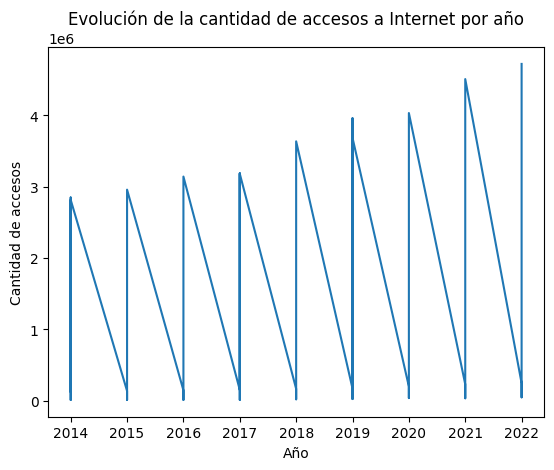

In [411]:

# Obtener los datos relevantes
años = Internet_BAF['Año']
cantidad_accesos = Internet_BAF['Total']

# Crear el gráfico de líneas
plt.plot(años, cantidad_accesos)

# Personalizar el gráfico
plt.xlabel('Año')
plt.ylabel('Cantidad de accesos')
plt.title('Evolución de la cantidad de accesos a Internet por año')

# Mostrar el gráfico
plt.show()


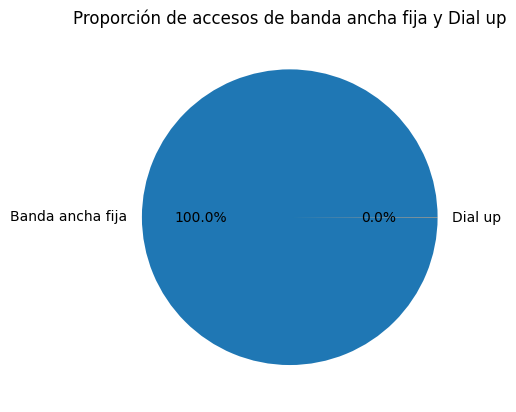

In [412]:
# Obtener los datos relevantes
banda_ancha_fija = Internet_BAF['Banda ancha fija'].sum()
dial_up = Internet_BAF['Dial up'].sum()
total = Internet_BAF['Total'].sum()

# Crear los datos para el gráfico de pastel
datos = [banda_ancha_fija, dial_up]
etiquetas = ['Banda ancha fija', 'Dial up']

# Crear el gráfico de pastel
plt.pie(datos, labels=etiquetas, autopct='%1.1f%%')

# Personalizar el gráfico
plt.title('Proporción de accesos de banda ancha fija y Dial up')

# Mostrar el gráfico
plt.show()


La cantidad de accesos a la banda ancha fija es considerablemente mayor que los accesos a través de Dial up, lo que refleja una clara preferencia por la banda ancha fija debido a su mayor velocidad y capacidad de conexión.
Podemos concluir que la mayoría de las personas utilizan la banda ancha fija para acceder a Internet, mientras que el acceso a través de Dial up es mucho menos común. Además, la cantidad total de accesos a Internet es considerable, lo que indica una alta penetración de Internet en la población.

# Continuamos con el siguiente codigo

In [305]:
data_Internet_BAF = pd.read_csv('..\data\Internet_BAF.csv')
data_Internet_BAF.head()

,Año,Trimestre,Banda ancha fija,Dial up,Total,Periodo
0,2022,3,11.078.691,12.437,11.091.128,Jul-Sept 2022
1,2022,2,10.946.248,12.436,10.958.684,Abr-Jun 2022
2,2022,1,10.611.390,12.619,10.624.009,Ene-Mar 2022
3,2021,4,10.476.933,12.861,10.489.794,Oct-Dic 2021
4,2021,3,10.075.184,10.357,10.085.541,Jul-Sept 2021


In [306]:
#verificamos el número de filas y columnas en el conjunto de datos 
print("Número de filas y columnas:", data_Internet_BAF.shape)

Número de filas y columnas: (35, 6)


In [307]:
#verificamos las columnas
print("Nombres de columnas:", data_Internet_BAF.columns)

Nombres de columnas: Index(['Año', 'Trimestre', 'Banda ancha fija', 'Dial up', 'Total', 'Periodo'], dtype='object')


In [308]:
#examinamos los tipos de datos de cada columna
print("Tipos de datos de las columnas:\n", data_Internet_BAF.dtypes)

Tipos de datos de las columnas:
 Año                   int64
Trimestre             int64
Banda ancha fija     object
Dial up             float64
Total                object
Periodo              object
dtype: object


In [309]:
# Lidiar con los valores faltantes
print("Valores faltantes por columna:\n", data_Internet_BAF.isnull().sum())

Valores faltantes por columna:
 Año                 0
Trimestre           0
Banda ancha fija    0
Dial up             0
Total               0
Periodo             0
dtype: int64


In [413]:
data_Internet_BAF.describe()

,Año,Trimestre,Banda ancha fija,Dial up
count,35.000000,35.000000,3.500000e+01,35.000000
mean,2017.885714,2.457143,8.274417e+06,20247.000000
std,2.564135,1.120474,1.408774e+06,11533.554299
min,2014.000000,1.000000,6.362108e+06,2853.000000
25%,2016.000000,1.500000,7.024946e+06,10072.000000
50%,2018.000000,2.000000,8.083533e+06,21793.000000
75%,2020.000000,3.000000,9.244537e+06,30510.000000
max,2022.000000,4.000000,1.107869e+07,39324.000000


In [314]:
data_Internet_BAF.to_csv('..\data_clean\data_Internet_BAF(2).csv')

# Realizamos un gráfico de barras para observar cuál es el tipo de internet más consumido a lo largo del tiempo

In [311]:
data_Internet_BAF['Banda ancha fija'] = data_Internet_BAF['Banda ancha fija'].astype(str).replace('- 0', '0').str.replace('.', '').astype(float)
data_Internet_BAF['Dial up'] = data_Internet_BAF['Dial up'].astype(str).replace('- 0', '0').str.replace('.', '').astype(float)


C:\Users\Ricky Quinteros\AppData\Local\Temp\ipykernel_8892\1818774125.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data_Internet_BAF['Banda ancha fija'] = data_Internet_BAF['Banda ancha fija'].astype(str).replace('- 0', '0').str.replace('.', '').astype(float)
C:\Users\Ricky Quinteros\AppData\Local\Temp\ipykernel_8892\1818774125.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data_Internet_BAF['Dial up'] = data_Internet_BAF['Dial up'].astype(str).replace('- 0', '0').str.replace('.', '').astype(float)


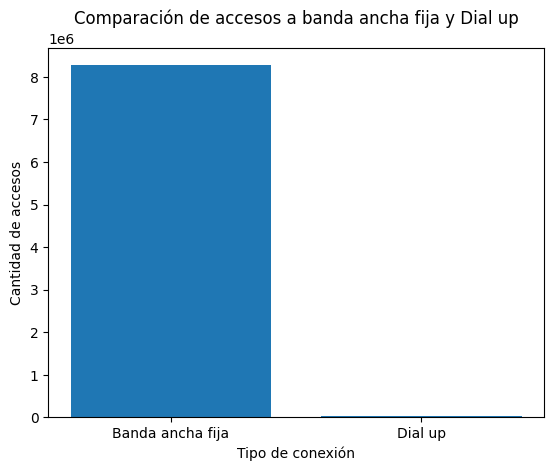

In [414]:
# Seleccionar las columnas relevantes para el gráfico
columnas_conexion = ['Banda ancha fija', 'Dial up']

# Obtener los valores de las conexiones
valores_conexion = data_Internet_BAF[columnas_conexion].mean()

# Crear el gráfico de barras
plt.bar(columnas_conexion, valores_conexion)

# Personalizar el gráfico
plt.xlabel('Tipo de conexión')
plt.ylabel('Cantidad de accesos')
plt.title('Comparación de accesos a banda ancha fija y Dial up')

# Mostrar el gráfico
plt.show()


C:\Users\Ricky Quinteros\AppData\Local\Temp\ipykernel_8892\1416784122.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  valores_accesos = data_Internet_BAF.groupby('Año')['Banda ancha fija', 'Dial up'].sum()


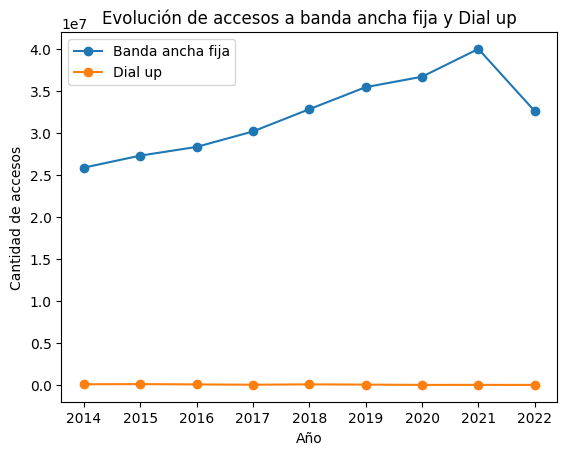

In [415]:
# Obtener los valores de los accesos por año o trimestre
valores_accesos = data_Internet_BAF.groupby('Año')['Banda ancha fija', 'Dial up'].sum()

# Crear el gráfico de líneas
valores_accesos.plot(kind='line', marker='o')

# Personalizar el gráfico
plt.xlabel('Año')
plt.ylabel('Cantidad de accesos')
plt.title('Evolución de accesos a banda ancha fija y Dial up')

# Mostrar el gráfico
plt.show()


En conclusión podemos observar que ambos dataframes tienen información relacionada con la cantidad de accesos a Internet en diferentes categorías y períodos de tiempo. Sin embargo, el dataframe anterior Internet_BAF se centraba más en la velocidad de Internet, mientras que este data_Internet_BAF se enfoca en la distribución de accesos entre banda ancha fija y Dial up.

# continuamos con el siguiente dataset Internet_Ingresos.csv

In [315]:
#cargamos nuestros datos
internet_Ingresos = pd.read_csv('..\data\Internet_Ingresos.csv')
internet_Ingresos.head()

,Año,Trimestre,Ingresos (miles de pesos),Periodo
0,2022,3,67.055.930,Jul-Sept 2022
1,2022,2,60.335.724,Abr-Jun 2022
2,2022,1,55.589.997,Ene-Mar 2022
3,2021,4,45.467.887,Oct-Dic 2021
4,2021,3,42.999.944,Jul-Sept 2021


In [317]:
#verificamos el número de filas y columnas en el conjunto de datos 
print("Número de filas y columnas:", internet_Ingresos.shape)

Número de filas y columnas: (35, 4)


In [318]:
#verificamos las columnas
print("Nombres de columnas:", internet_Ingresos.columns)

Nombres de columnas: Index(['Año', 'Trimestre', 'Ingresos (miles de pesos)', 'Periodo'], dtype='object')


In [319]:
#examinamos los tipos de datos de cada columna
print("Tipos de datos de las columnas:\n", internet_Ingresos.dtypes)

Tipos de datos de las columnas:
 Año                           int64
Trimestre                     int64
Ingresos (miles de pesos)    object
Periodo                      object
dtype: object


In [320]:
# Lidiar con los valores faltantes
print("Valores faltantes por columna:\n", internet_Ingresos.isnull().sum())

Valores faltantes por columna:
 Año                          0
Trimestre                    0
Ingresos (miles de pesos)    0
Periodo                      0
dtype: int64


In [416]:
internet_Ingresos.describe()

,Año,Trimestre,Ingresos (miles de pesos)
count,35.000000,35.000000,3.500000e+01
mean,2017.885714,2.457143,2.058845e+07
std,2.564135,1.120474,1.774214e+07
min,2014.000000,1.000000,2.984054e+06
25%,2016.000000,1.500000,6.235543e+06
50%,2018.000000,2.000000,1.431947e+07
75%,2020.000000,3.000000,3.204996e+07
max,2022.000000,4.000000,6.705593e+07


 Los ingresos en miles de pesos varían ampliamente en el conjunto de datos, con un promedio de alrededor de 20 millones de pesos. Existe una diferencia significativa entre los valores mínimo y máximo, lo que indica una amplia gama de ingresos en el período analizado.

In [326]:
#guardamos nuestro datos
internet_Ingresos.to_csv('..\data_clean\internet_Ingresos.csv')

# Realizamos un gráfico de incremento de ingresos en el consumo de internet a lo largo del tiempo

In [322]:
internet_Ingresos['Ingresos (miles de pesos)'] = internet_Ingresos['Ingresos (miles de pesos)'].astype(str).replace('- 0', '0').str.replace('.', '').astype(float)


C:\Users\Ricky Quinteros\AppData\Local\Temp\ipykernel_8892\3983819433.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  internet_Ingresos['Ingresos (miles de pesos)'] = internet_Ingresos['Ingresos (miles de pesos)'].astype(str).replace('- 0', '0').str.replace('.', '').astype(float)


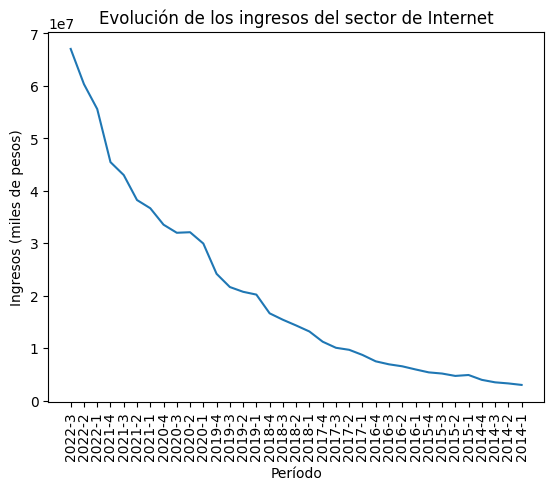

In [417]:
# Datos de años, trimestres y ingresos
años = internet_Ingresos['Año']
trimestres = internet_Ingresos['Trimestre']
ingresos = internet_Ingresos['Ingresos (miles de pesos)']

# Crear el gráfico de líneas
plt.plot(range(len(ingresos)), ingresos)

# Personalizar el gráfico
plt.xlabel('Período')
plt.ylabel('Ingresos (miles de pesos)')
plt.title('Evolución de los ingresos del sector de Internet')

# Establecer las etiquetas de los períodos en el eje x
plt.xticks(range(len(ingresos)), [f'{año}-{trim}' for año, trim in zip(años, trimestres)], rotation=90)

# Mostrar el gráfico
plt.show()


Tendencia de ingresos: Observamos la tendencia general de los ingresos del sector de Internet a lo largo del tiempo. Si la línea muestra una tendencia ascendente, indica un crecimiento en los ingresos del sector, mientras que una tendencia descendente indica una disminución en los ingresos.

Patrones estacionales: Pbservamos  los períodos trimestrales, es posible identificar patrones estacionales en los ingresos del sector. Por ejemplo, si hay un aumento en los ingresos en ciertos trimestres específicos cada año, puede indicar estacionalidad en la demanda de servicios de Internet.

Variaciones a corto plazo: Al observa las fluctuaciones a corto plazo en los ingresos del sector. Pueden haber períodos con incrementos o decrementos significativos en los ingresos, lo que puede estar relacionado con factores económicos, cambios en la competencia o eventos específicos en la industria.

Comparación interanual: Comparar los ingresos de un año con respecto a los ingresos del año anterior en el mismo trimestre. Esto permite identificar si ha habido un crecimiento o disminución en los ingresos en relación con el mismo período del año anterior.

podemos concluir que los ingresos generados por el sector de Internet tienen una amplia variabilidad, pero en promedio se mantienen en torno a los 20.6 millones de pesos. Existen casos donde los ingresos superan los 30 millones e incluso los 60 millones de pesos.

# continuamos con el siguiente dataset Internet_Penetracion (1).csv

In [328]:
internet_Penetracion = pd.read_csv('..\data\Internet_Penetracion (1).csv')
internet_Penetracion.head()

,Año,Trimestre,Accesos por cada 100 hogares,Accesos por cada 100 hab,Periodo
0,2022,3,"76,64","23,95",Jul-Sept 2022
1,2022,2,"75,97","23,72",Abr-Jun 2022
2,2022,1,"73,88","23,05",Ene-Mar 2022
3,2021,4,"73,18","22,81",Oct-Dic 2021
4,2021,3,"70,58","21,98",Jul-Sept 2021


In [329]:
#verificamos el número de filas y columnas en el conjunto de datos 
print("Número de filas y columnas:", internet_Penetracion.shape)

Número de filas y columnas: (35, 5)


In [330]:
#verificamos las columnas
print("Nombres de columnas:", internet_Penetracion.columns)

Nombres de columnas: Index(['Año', 'Trimestre', 'Accesos por cada 100 hogares',
       'Accesos por cada 100 hab', 'Periodo'],
      dtype='object')


In [331]:
#examinamos los tipos de datos de cada columna
print("Tipos de datos de las columnas:\n", internet_Penetracion.dtypes)

Tipos de datos de las columnas:
 Año                              int64
Trimestre                        int64
Accesos por cada 100 hogares    object
Accesos por cada 100 hab        object
Periodo                         object
dtype: object


In [332]:
# Lidiar con los valores faltantes
print("Valores faltantes por columna:\n", internet_Penetracion.isnull().sum())

Valores faltantes por columna:
 Año                             0
Trimestre                       0
Accesos por cada 100 hogares    0
Accesos por cada 100 hab        0
Periodo                         0
dtype: int64


In [418]:
internet_Penetracion.describe()

,Año,Trimestre,Accesos por cada 100 hogares,Accesos por cada 100 hab
count,35.000000,35.000000,35.000000,35.000000
mean,2017.885714,2.457143,60.275429,18.606286
std,2.564135,1.120474,8.148909,2.662968
min,2014.000000,1.000000,49.550000,15.050000
25%,2016.000000,1.500000,52.985000,16.245000
50%,2018.000000,2.000000,59.160000,18.240000
75%,2020.000000,3.000000,66.050000,20.475000
max,2022.000000,4.000000,76.640000,23.950000


 Existe cierta variabilidad en la penetración de Internet entre diferentes hogares y habitantes, como se evidencia en los valores mínimo, máximo y el rango intercuartil. Sin embargo, en general, la penetración de Internet en Argentina parece estar en un nivel moderado a alto, considerando los valores promedio.

In [338]:
#guardamos esos datos
internet_Penetracion.to_csv('..\data_clean\internet_Penetracion(1).csv')

# Realizamos un gráfico de la penetración del internet a lo largo de los años

In [335]:
#convertimos nuestro datos 
internet_Penetracion['Accesos por cada 100 hogares'] = internet_Penetracion['Accesos por cada 100 hogares'].str.replace(',', '.').astype(float)
internet_Penetracion['Accesos por cada 100 hab'] = internet_Penetracion['Accesos por cada 100 hab'].str.replace(',', '.').astype(float)


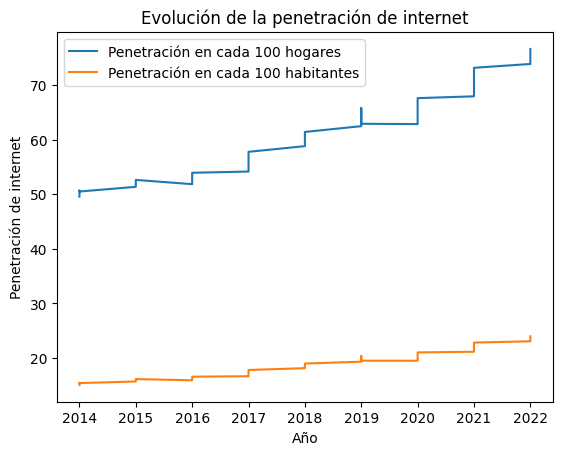

In [336]:
# Crear el gráfico de líneas
plt.plot(internet_Penetracion['Año'], internet_Penetracion['Accesos por cada 100 hogares'], label='Penetración en cada 100 hogares')
plt.plot(internet_Penetracion['Año'], internet_Penetracion['Accesos por cada 100 hab'], label='Penetración en cada 100 habitantes')

# Personalizar el gráfico
plt.xlabel('Año')
plt.ylabel('Penetración de internet')
plt.title('Evolución de la penetración de internet')
plt.legend()

# Mostrar el gráfico
plt.show()


El gráfico resultante es la evolución de la penetración de internet en Argentina a lo largo de los años. Al trazar dos líneas, una para la penetración en cada 100 hogares y otra para la penetración en cada 100 habitantes, se puede comparar cómo ha cambiado el acceso a internet en ambos grupos. Se observa que la penetración de Internet en la población es de constante aumento.
Además, al observar las fluctuaciones en las líneas a lo largo de los años, se pueden identificar momentos de crecimiento acelerado, estabilidad o incluso retrocesos en la penetración de internet.

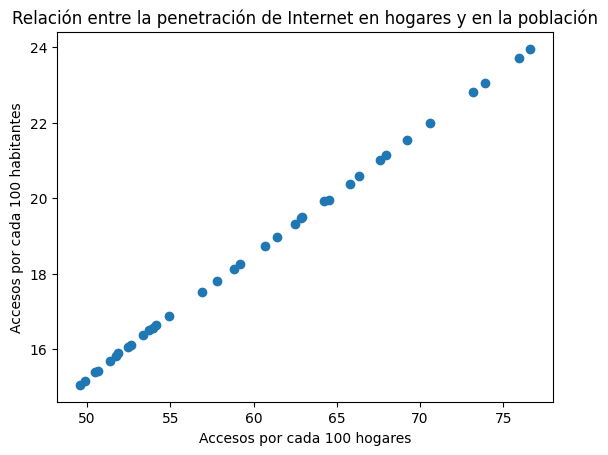

In [419]:
# Obtener los datos de la penetración de Internet en hogares y en la población
accesos_hogares = internet_Penetracion['Accesos por cada 100 hogares']
accesos_poblacion = internet_Penetracion['Accesos por cada 100 hab']

# Crear el gráfico de dispersión
plt.scatter(accesos_hogares, accesos_poblacion)

# Personalizar el gráfico
plt.xlabel('Accesos por cada 100 hogares')
plt.ylabel('Accesos por cada 100 habitantes')
plt.title('Relación entre la penetración de Internet en hogares y en la población')

# Mostrar el gráfico
plt.show()


Indica que a medida que aumenta la penetración de Internet en hogares, también aumenta en la población. Esto sugiere una correlación positiva entre ambas variables.

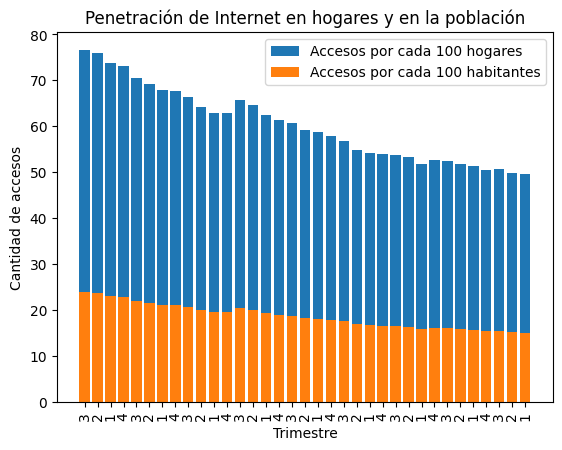

In [421]:
# Obtener los datos de la penetración de Internet en hogares y en la población
accesos_hogares = internet_Penetracion['Accesos por cada 100 hogares']
accesos_poblacion = internet_Penetracion['Accesos por cada 100 hab']

# Configurar las posiciones de las barras
posiciones = np.arange(len(accesos_hogares))

# Crear el gráfico de barras
plt.bar(posiciones, accesos_hogares, label='Accesos por cada 100 hogares')
plt.bar(posiciones, accesos_poblacion, label='Accesos por cada 100 habitantes')

# Personalizar el gráfico
plt.xlabel('Trimestre')
plt.ylabel('Cantidad de accesos')
plt.title('Penetración de Internet en hogares y en la población')
plt.xticks(posiciones, internet_Penetracion['Trimestre'], rotation=90)
plt.legend()

# Mostrar el gráfico
plt.show()


La penetración de Internet en hogares y en la población en general ha experimentado un aumento a lo largo del tiempo.
En promedio, hay alrededor de 60 accesos a Internet por cada 100 hogares y aproximadamente 18 accesos por cada 100 habitantes.
En conclusión estos resultados indican que en general ha habido un crecimiento en la adopción de Internet en los hogares y un aumento en la cantidad de accesos por habitante.

# Continuamos con el siguiente dataset Internet_Penetracion.csv

In [339]:
#cargamos nuestro dato
data_Internet_Penetracion = pd.read_csv('..\data\Internet_Penetracion.csv')
data_Internet_Penetracion.head()

,Año,Trimestre,Provincia,Accesos por cada 100 hogares
0,2022,3,Buenos Aires,"78,11"
1,2022,3,Capital Federal,"122,28"
2,2022,3,Catamarca,"65,33"
3,2022,3,Chaco,"43,86"
4,2022,3,Chubut,"84,38"


In [340]:
#verificamos el número de filas y columnas en el conjunto de datos 
print("Número de filas y columnas:", data_Internet_Penetracion.shape)

Número de filas y columnas: (840, 4)


In [341]:
#verificamos las columnas
print("Nombres de columnas:", data_Internet_Penetracion.columns)

Nombres de columnas: Index(['Año', 'Trimestre', 'Provincia', 'Accesos por cada 100 hogares'], dtype='object')


In [342]:
#examinamos los tipos de datos de cada columna
print("Tipos de datos de las columnas:\n", data_Internet_Penetracion.dtypes)

Tipos de datos de las columnas:
 Año                              int64
Trimestre                        int64
Provincia                       object
Accesos por cada 100 hogares    object
dtype: object


In [343]:
# Lidiar con los valores faltantes
print("Valores faltantes por columna:\n", data_Internet_Penetracion.isnull().sum())

Valores faltantes por columna:
 Año                             0
Trimestre                       0
Provincia                       0
Accesos por cada 100 hogares    0
dtype: int64


In [422]:
data_Internet_Penetracion.describe()

,Año,Trimestre,Accesos por cada 100 hogares
count,840.000000,840.000000,840.000000
mean,2017.885714,2.457143,49.065750
std,2.528745,1.105009,23.151885
min,2014.000000,1.000000,9.350000
25%,2016.000000,1.000000,32.107500
50%,2018.000000,2.000000,45.900000
75%,2020.000000,3.000000,61.865000
max,2022.000000,4.000000,124.060000


Los datos indican que hay una variabilidad en la penetración de Internet en los hogares a lo largo del tiempo, con una media cercana al 49%. 

In [349]:
data_Internet_Penetracion.to_csv('..\data_clean\Internet_Penetracion(2).csv')

# Realizamos un gráfico


In [ ]:
#Convertimos nuestras columnas a datos numéricos
data_Internet_Penetracion['Accesos por cada 100 hogares'] = data_Internet_Penetracion['Accesos por cada 100 hogares'].str.replace(',', '.').astype(float)


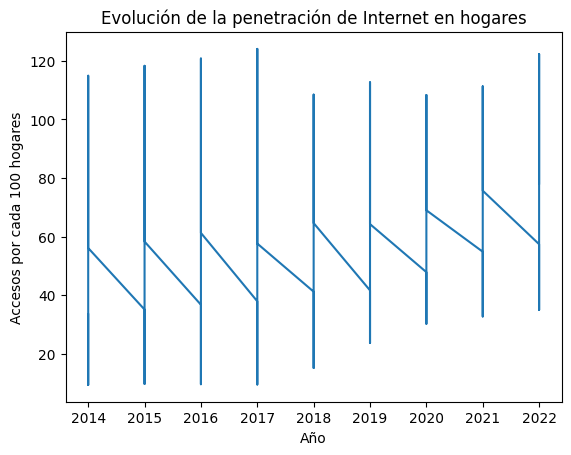

In [427]:
# Obtener los valores de los años y la penetración de Internet en hogares
anios = data_Internet_Penetracion['Año']
penetracion_hogares = data_Internet_Penetracion['Accesos por cada 100 hogares']

# Crear el gráfico de línea
plt.plot(anios, penetracion_hogares)

# Personalizar el gráfico
plt.xlabel('Año')
plt.ylabel('Accesos por cada 100 hogares')
plt.title('Evolución de la penetración de Internet en hogares')

# Mostrar el gráfico
plt.show()


 En el anterior, teníamos los accesos por cada 100 hogares y por cada 100 habitantes, mientras que en este nuevo dataframe solo tenemos los accesos por cada 100 hogares. Sin embargo, en ambos casos, podemos analizar la evolución y distribución de la penetración de Internet a lo largo del tiempo.
 En conclusión  en ambos casos, podemos analizar la evolución y distribución de la penetración de Internet a lo largo del tiempo.

# EN CONCLUSIÓN:

### Accesos a Internet: El número de accesos a Internet ha mostrado un crecimiento constante a lo largo del tiempo, lo que indica una mayor adopción y demanda de servicios de conectividad en Argentina.

### Tecnologías de conexión: Se observa una diversidad de tecnologías de conexión utilizadas en el país, como ADSL, Cablemodem, Fibra Óptica, entre otras. Esto indica que los usuarios tienen opciones para acceder a Internet de acuerdo con su ubicación y preferencias.

### Velocidad de conexión: Existe una mejora gradual en la velocidad de conexión a lo largo del tiempo, lo cual es un indicador positivo de la infraestructura de red y la calidad de los servicios de Internet en Argentina.

### Penetración de Internet: La penetración de Internet en hogares y en la población muestra un aumento constante, lo que refleja una mayor disponibilidad y acceso a los servicios de Internet en todo el país.



### Tambien recalcar durante la época de la pandemia del COVID 19(2019 - 2022) hubo cambios significativos por ejemplo: 
### Aumento del trabajo y educación remotos: Con el cierre de oficinas y escuelas, muchas personas tuvieron que adaptarse al trabajo y educación en línea. Esto generó un aumento en la demanda de servicios de Internet para poder llevar a cabo estas actividades desde casa.

### Entretenimiento digital: Durante los períodos de confinamiento y restricciones de movilidad, las actividades de entretenimiento se trasladaron al ámbito digital. El consumo de contenido en línea, como streaming de películas, series, música y videojuegos, experimentó un aumento significativo, lo que contribuyó a un mayor consumo de datos y ancho de banda.

### Comunicación virtual: Las restricciones de viaje y distanciamiento social llevaron a un mayor uso de herramientas de comunicación en línea, como videollamadas, conferencias virtuales y redes sociales. Estas actividades requieren una conexión a Internet estable y de calidad.

### En resumen, durante la pandemia, el aumento del consumo de servicios de Internet en Argentina fue impulsado por la necesidad de adaptarse al trabajo y educación remotos, el entretenimiento digital y la comunicación virtual. Estos factores jugaron un papel clave en el incremento de la demanda y el uso de servicios de Internet en ese período.

##### Fuente: Ente Nacional de Comunicaciones (ENACOM), empresas proveedoras de servicios de Internet, investigaciones académicas y noticias en medios de comunicación.


